In [1]:
import impute as imp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calplot 
import datetime 
from pickle import dump,load
from tensorflow.keras.models import load_model

## Incomplete data with solar angles added imported without date index

In [15]:
path_archivo='../../01_weather_data/03_imputing_process/01_test_data/'
nombre_archivo='only_night_year.csv'#'Temixco_2018_incomplete_maxmin_mae_solar_angles.csv'
path_archivo2='../../01_weather_data/03_imputing_process/02_imputed_data/' #este path para donde quieres exportar los datos imputados
nombre_archivo2='tmx_CNN-LSTM_imputed.csv'
tmx_inc=pd.read_csv(path_archivo+nombre_archivo,parse_dates=True,)
tmx_inc

,time,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
0,2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
1,2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2,2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
3,2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
4,2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
52557,2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817
52558,2018-12-31 23:40:00,0.0,0.0,17.99,47.85,87470.02,1.528,358.8,-75.506650,160.527038


# Identify the ubication of the datavoids (date, location and length)

In [3]:
isteps,datavoids,idates=imp.void_identifier(tmx_inc,'Ig')

new_void_at: 2018-01-01 07:20:00
at index 44
65
new_void_at: 2018-01-09 07:20:00
at index 1196
66
new_void_at: 2018-01-17 07:20:00
at index 2348
66
new_void_at: 2018-01-25 07:20:00
at index 3500
67
new_void_at: 2018-02-02 07:20:00
at index 4652
67
new_void_at: 2018-02-10 07:20:00
at index 5804
68
new_void_at: 2018-02-18 07:10:00
at index 6955
69
new_void_at: 2018-02-26 07:10:00
at index 8107
69
new_void_at: 2018-03-06 07:00:00
at index 9258
71
new_void_at: 2018-03-14 07:00:00
at index 10410
71
new_void_at: 2018-03-22 06:50:00
at index 11561
72
new_void_at: 2018-03-30 06:40:00
at index 12712
73
new_void_at: 2018-04-07 06:40:00
at index 13864
73
new_void_at: 2018-04-15 06:30:00
at index 15015
75
new_void_at: 2018-04-23 06:20:00
at index 16166
76
new_void_at: 2018-05-01 06:20:00
at index 17318
76
new_void_at: 2018-05-09 06:10:00
at index 18469
77
new_void_at: 2018-05-17 06:10:00
at index 19621
78
new_void_at: 2018-05-25 06:10:00
at index 20773
78
new_void_at: 2018-06-02 06:10:00
at index 

In [4]:
idates

['2018-01-01 07:20:00',
 '2018-01-09 07:20:00',
 '2018-01-17 07:20:00',
 '2018-01-25 07:20:00',
 '2018-02-02 07:20:00',
 '2018-02-10 07:20:00',
 '2018-02-18 07:10:00',
 '2018-02-26 07:10:00',
 '2018-03-06 07:00:00',
 '2018-03-14 07:00:00',
 '2018-03-22 06:50:00',
 '2018-03-30 06:40:00',
 '2018-04-07 06:40:00',
 '2018-04-15 06:30:00',
 '2018-04-23 06:20:00',
 '2018-05-01 06:20:00',
 '2018-05-09 06:10:00',
 '2018-05-17 06:10:00',
 '2018-05-25 06:10:00',
 '2018-06-02 06:10:00',
 '2018-06-10 06:10:00',
 '2018-06-18 06:10:00',
 '2018-06-26 06:10:00',
 '2018-07-04 06:10:00',
 '2018-07-12 06:20:00',
 '2018-07-20 06:20:00',
 '2018-07-28 06:20:00',
 '2018-08-05 06:20:00',
 '2018-08-13 06:30:00',
 '2018-08-21 06:30:00',
 '2018-08-29 06:30:00',
 '2018-09-06 06:30:00',
 '2018-09-14 06:30:00',
 '2018-09-22 06:40:00',
 '2018-09-30 06:40:00',
 '2018-10-08 06:40:00',
 '2018-10-16 06:40:00',
 '2018-10-24 06:40:00',
 '2018-11-01 06:50:00',
 '2018-11-09 06:50:00',
 '2018-11-17 07:00:00',
 '2018-11-25 07:

#### Data voids location

In [5]:
isteps

[44,
 1196,
 2348,
 3500,
 4652,
 5804,
 6955,
 8107,
 9258,
 10410,
 11561,
 12712,
 13864,
 15015,
 16166,
 17318,
 18469,
 19621,
 20773,
 21925,
 23077,
 24229,
 25381,
 26533,
 27686,
 28838,
 29990,
 31142,
 32295,
 33447,
 34599,
 35751,
 36903,
 38056,
 39208,
 40360,
 41512,
 42664,
 43817,
 44969,
 46122,
 47274,
 48426,
 49579,
 50731,
 51884]

#### Data voids length

In [6]:
datavoids

[65,
 66,
 66,
 67,
 67,
 68,
 69,
 69,
 71,
 71,
 72,
 73,
 73,
 75,
 76,
 76,
 77,
 78,
 78,
 78,
 78,
 79,
 79,
 79,
 78,
 78,
 78,
 77,
 76,
 75,
 75,
 74,
 73,
 71,
 71,
 70,
 69,
 69,
 67,
 67,
 66,
 66,
 66,
 65,
 65,
 65]

In [7]:
tmx_inc

,time,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
0,2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
1,2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2,2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
3,2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
4,2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
52557,2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817
52558,2018-12-31 23:40:00,0.0,0.0,17.99,47.85,87470.02,1.528,358.8,-75.506650,160.527038


### Verifico que s'i hay un vac'io de datos

/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_6528/894282674.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax=plt.subplots(figsize=(20,10))


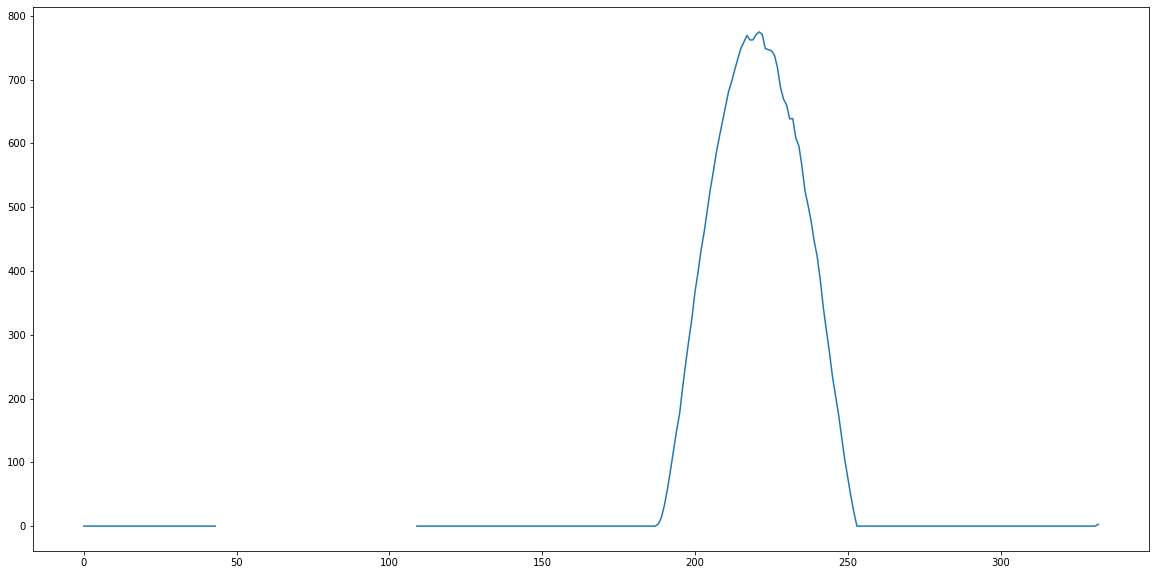

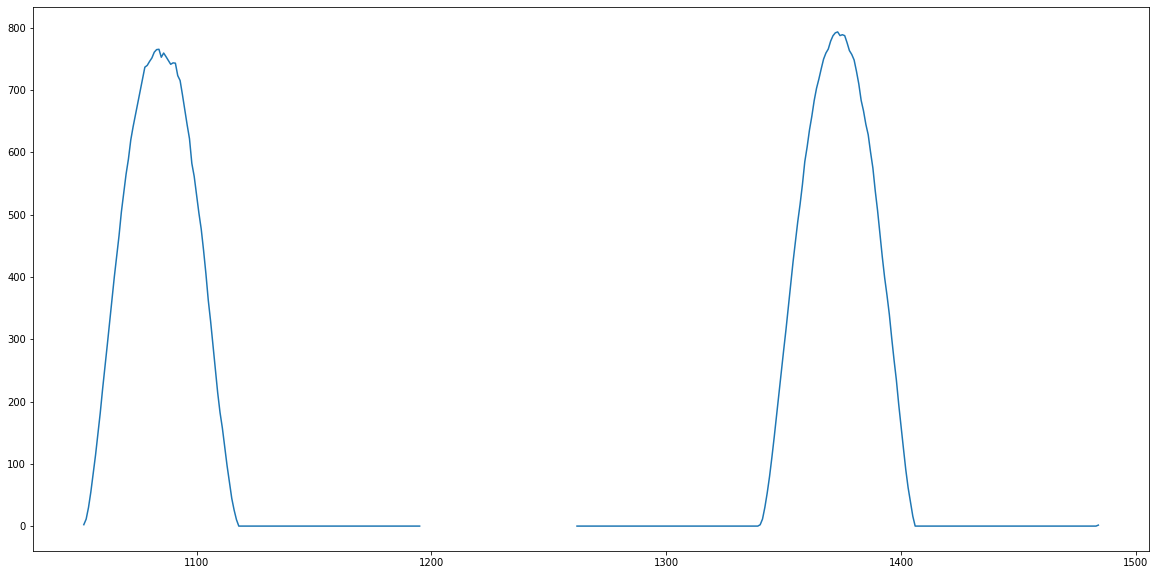

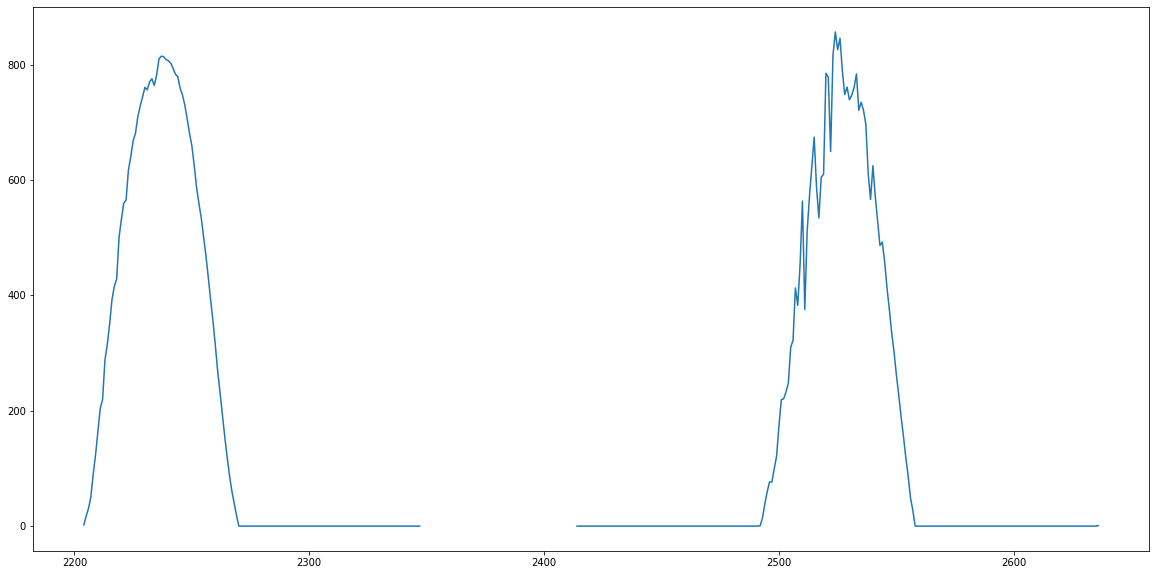

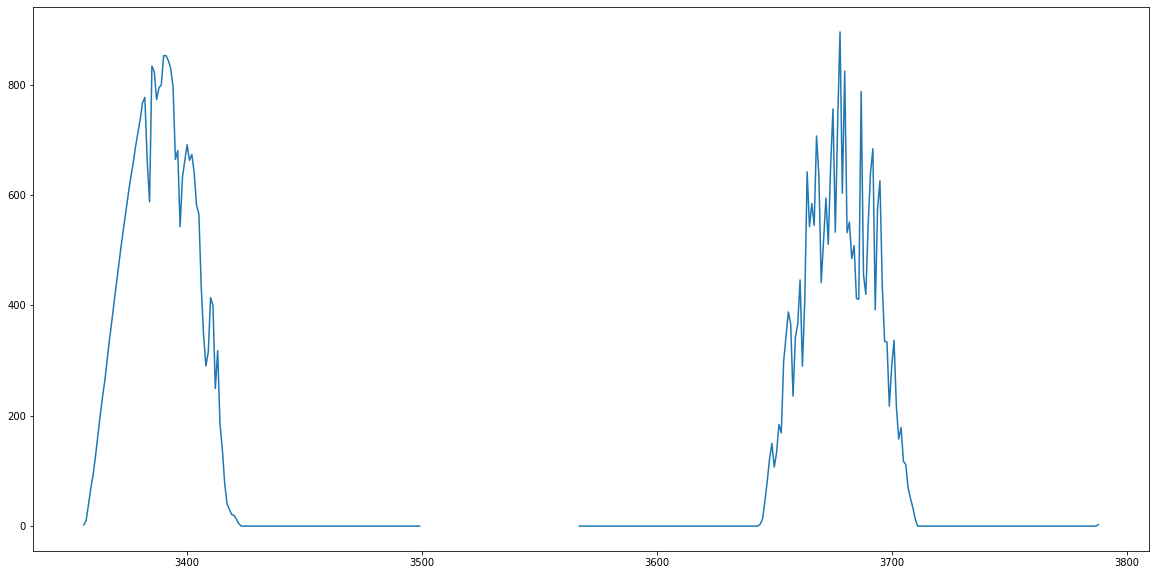

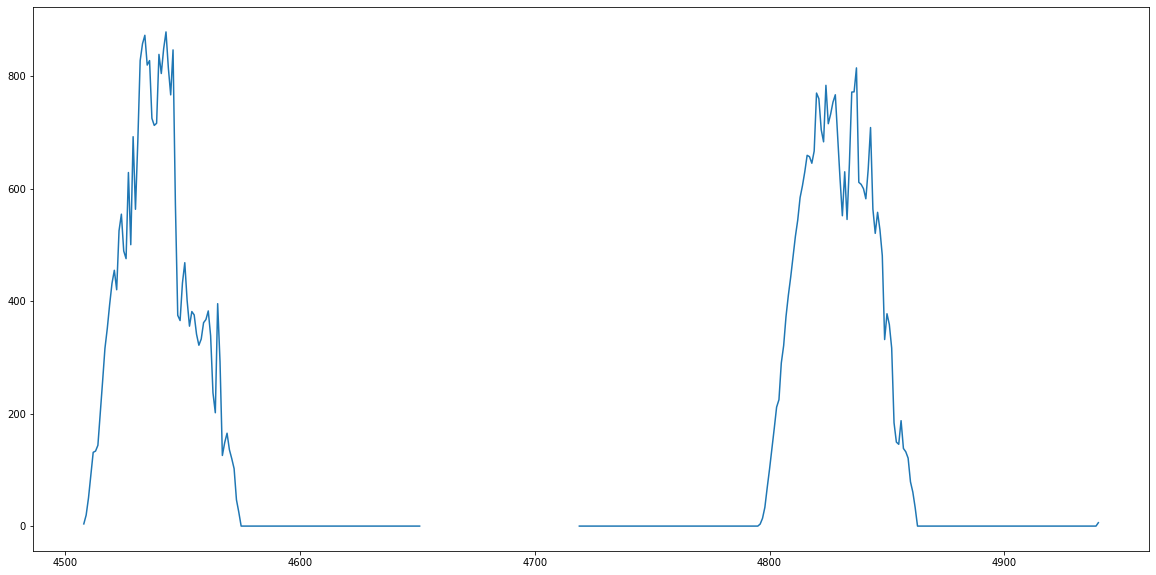

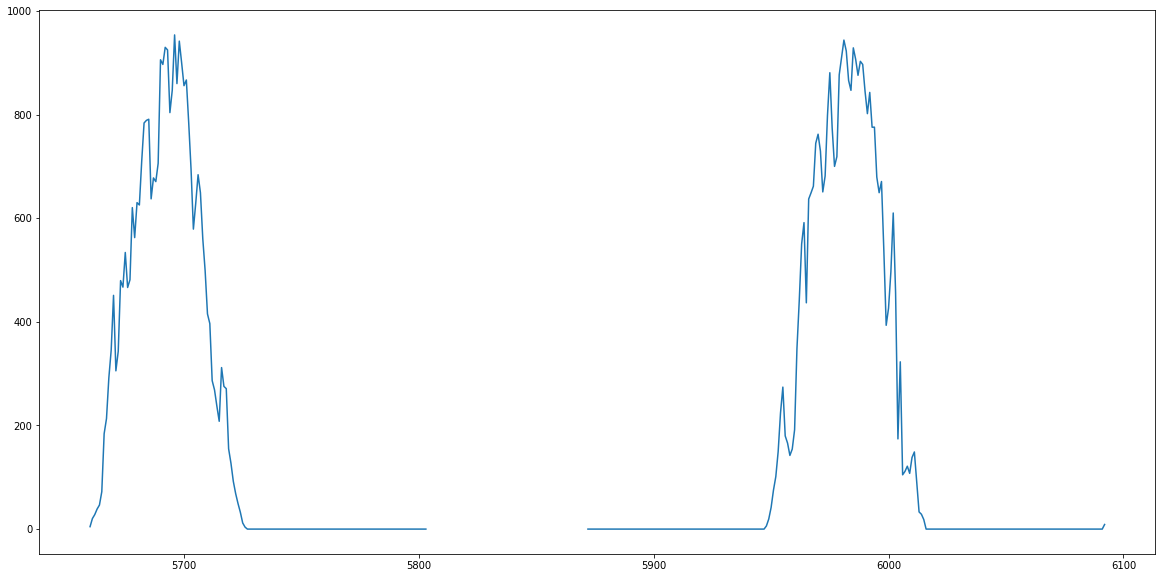

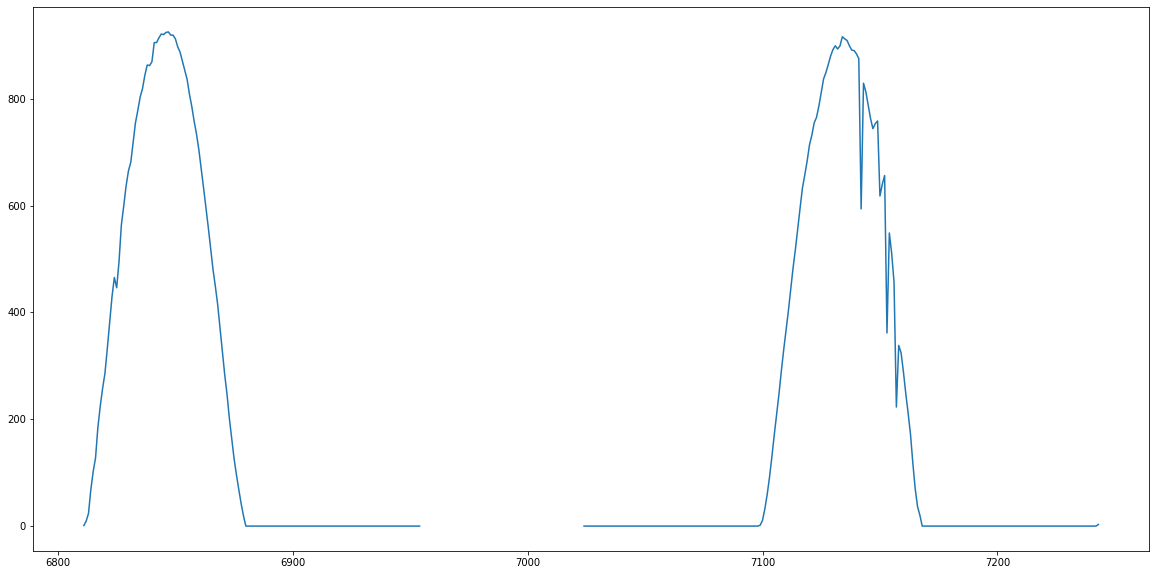

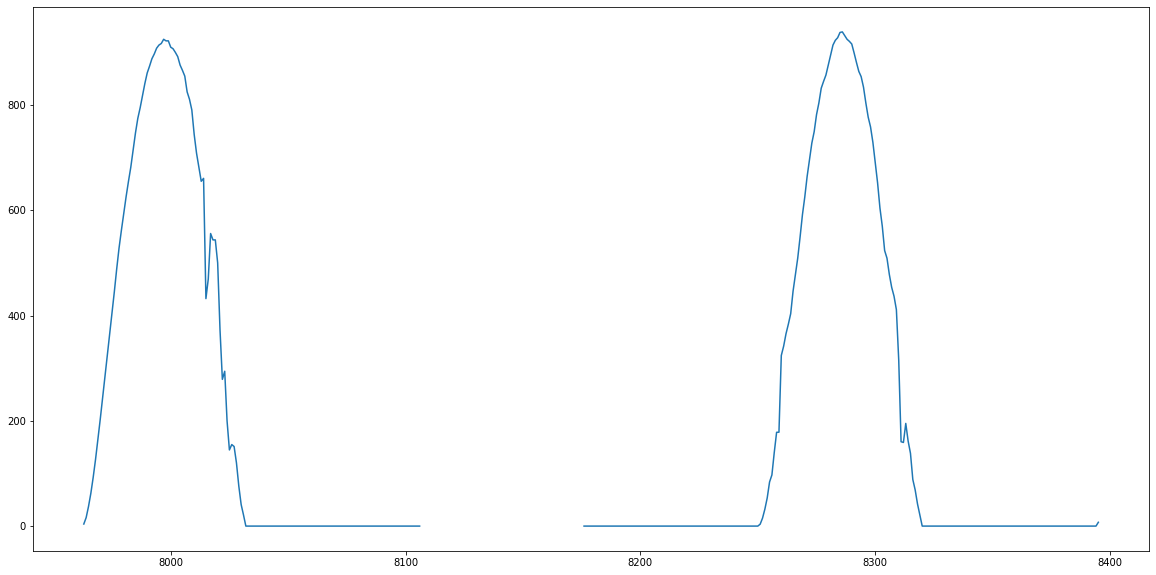

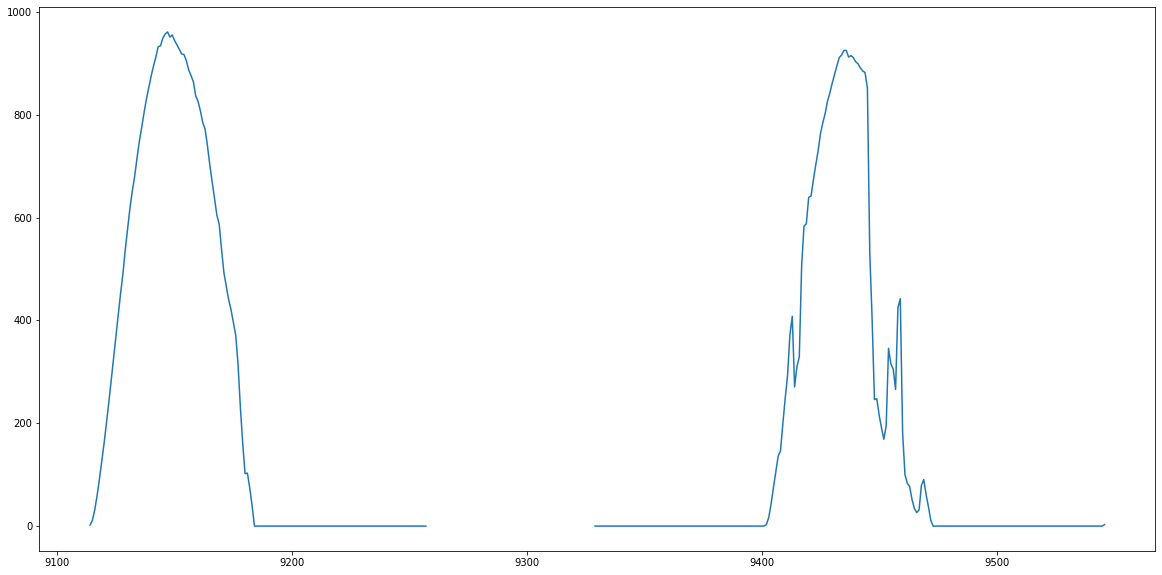

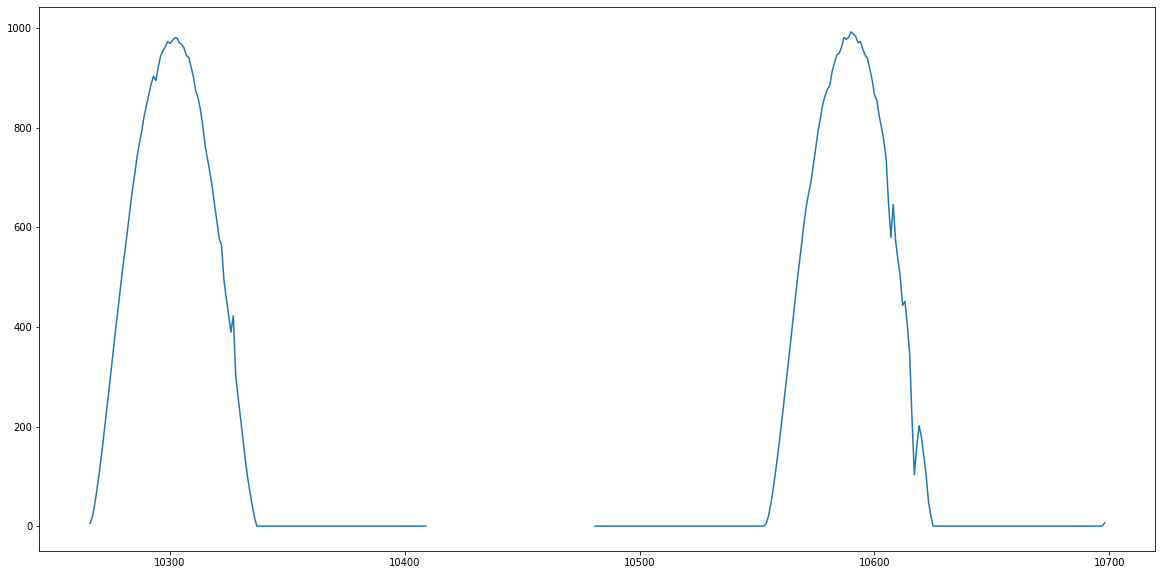

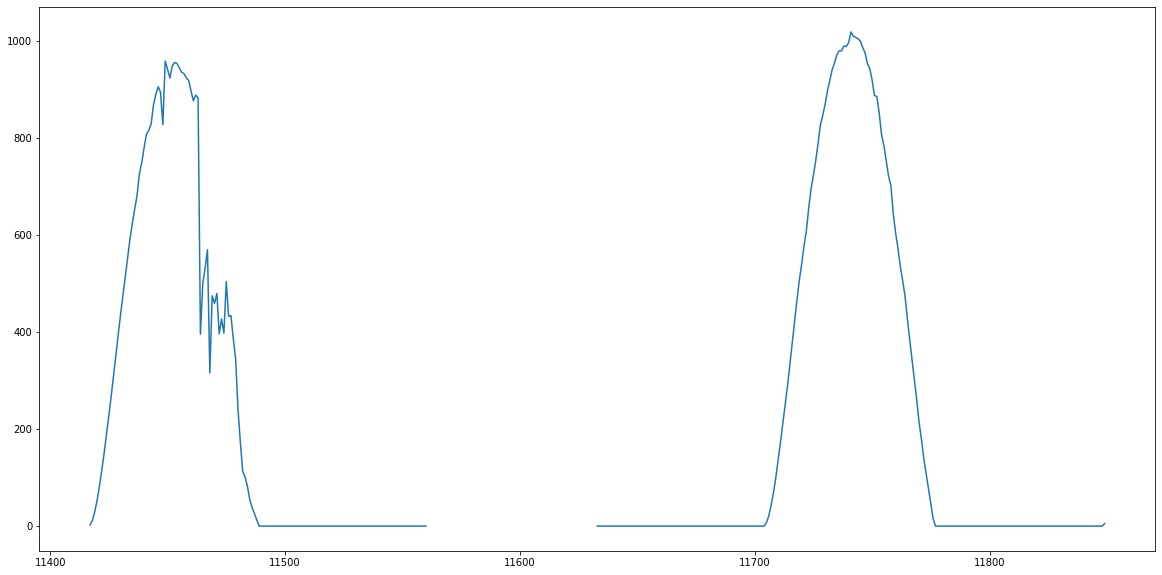

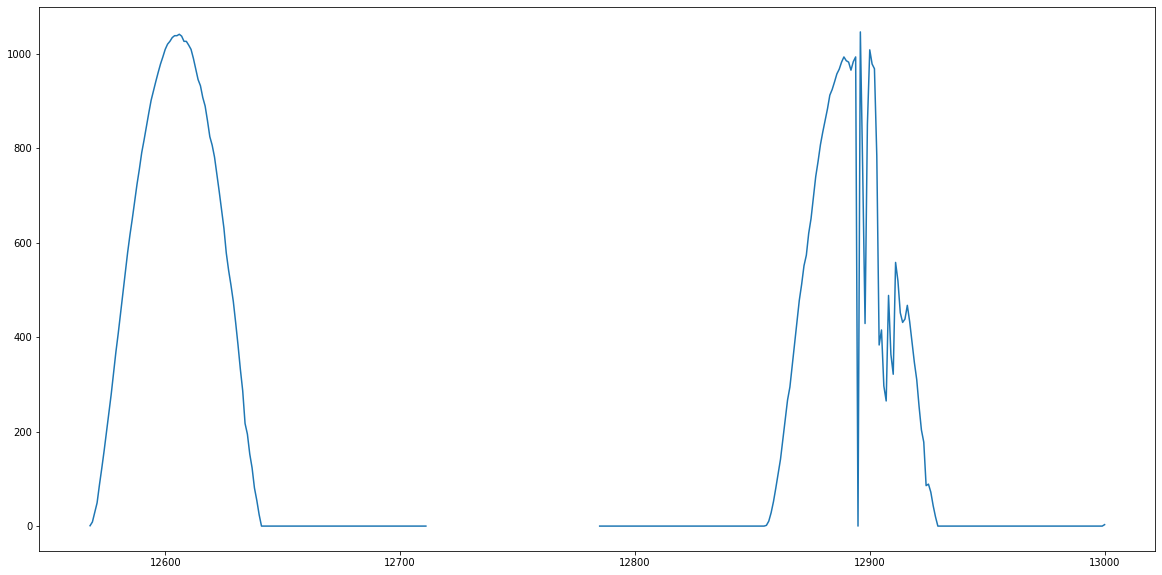

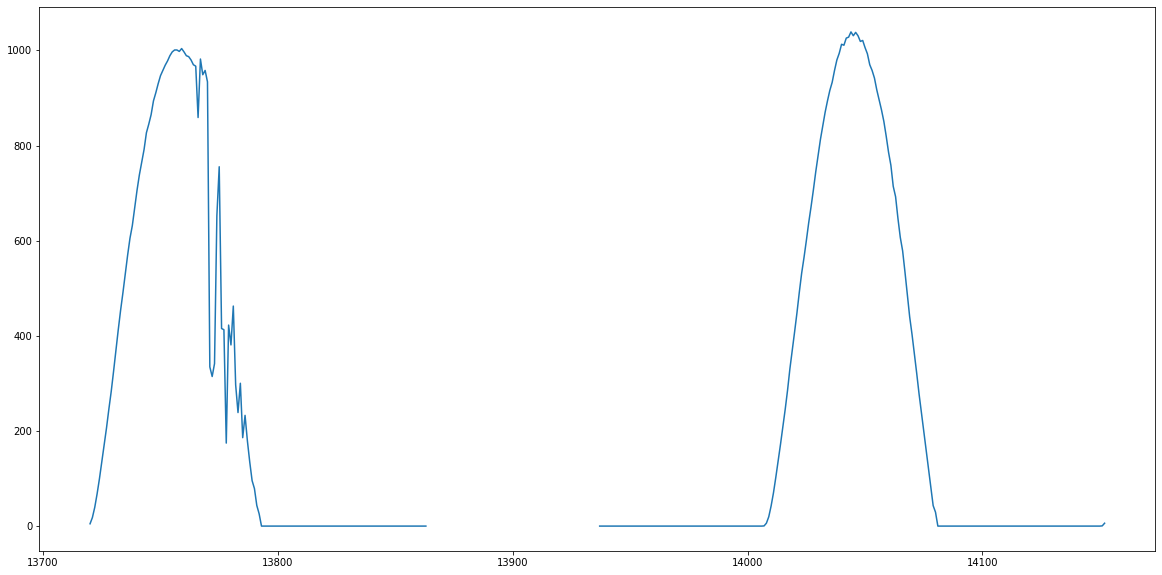

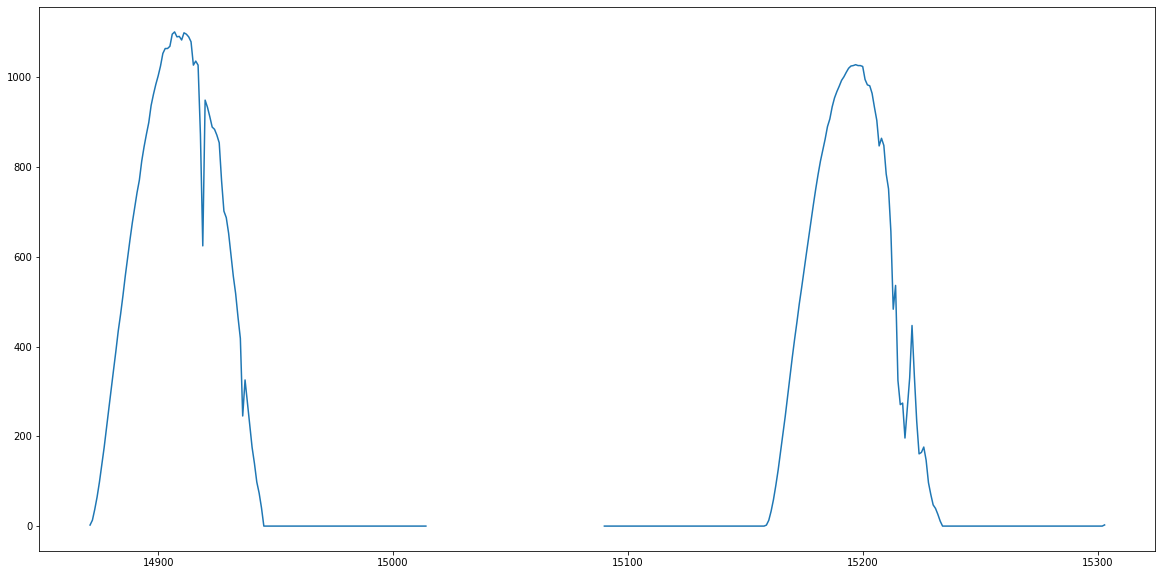

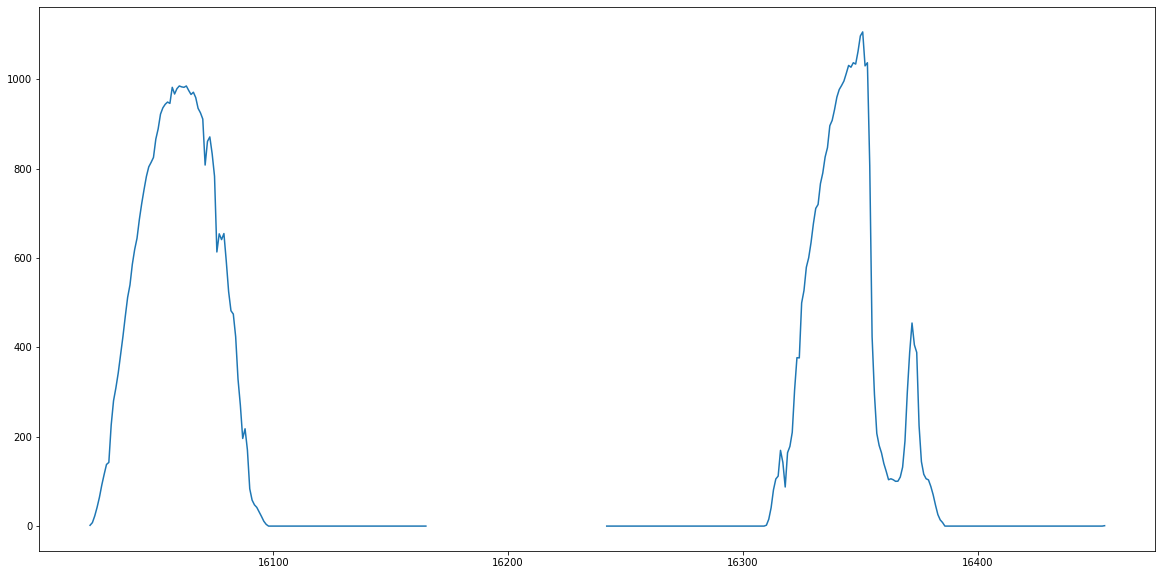

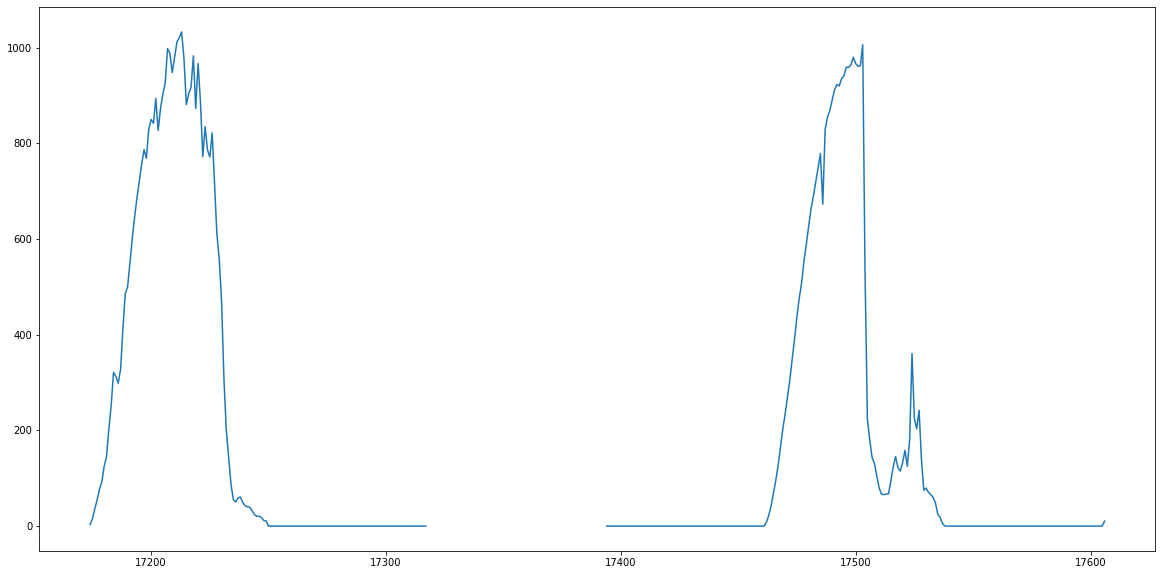

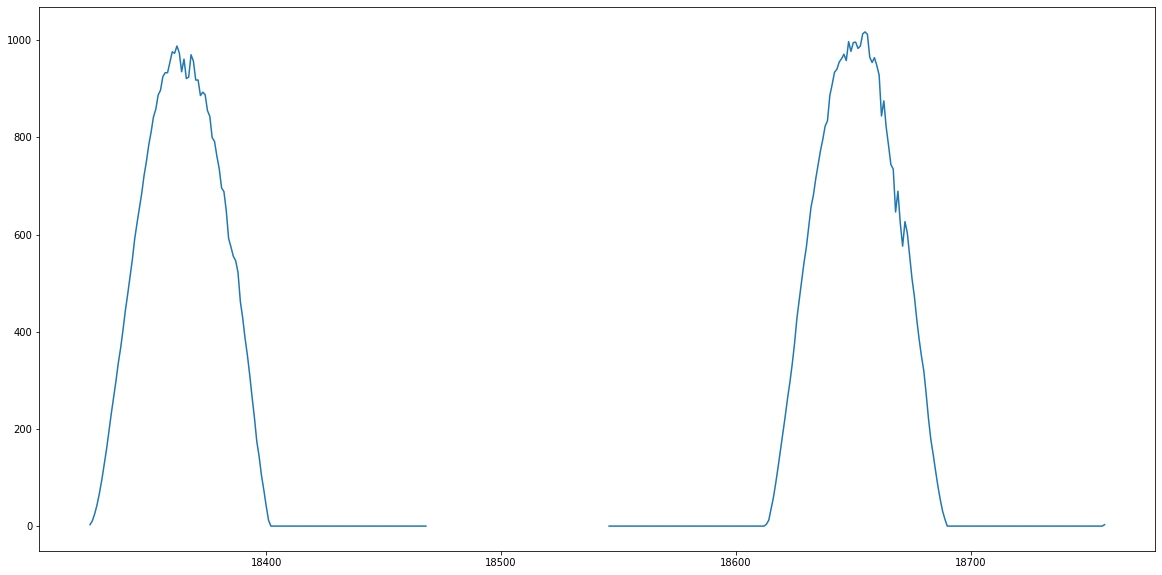

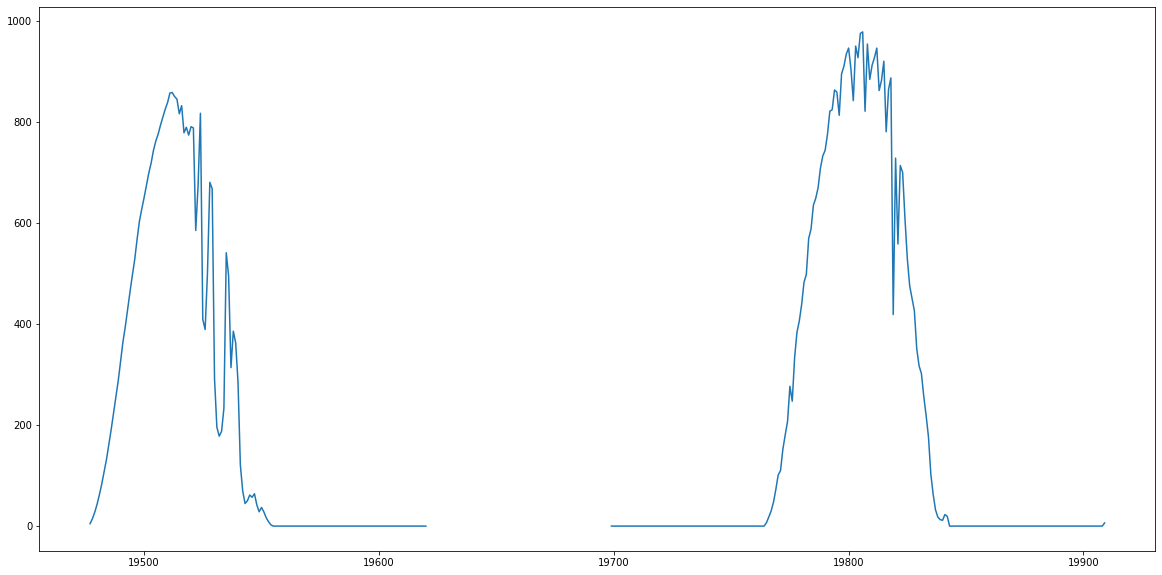

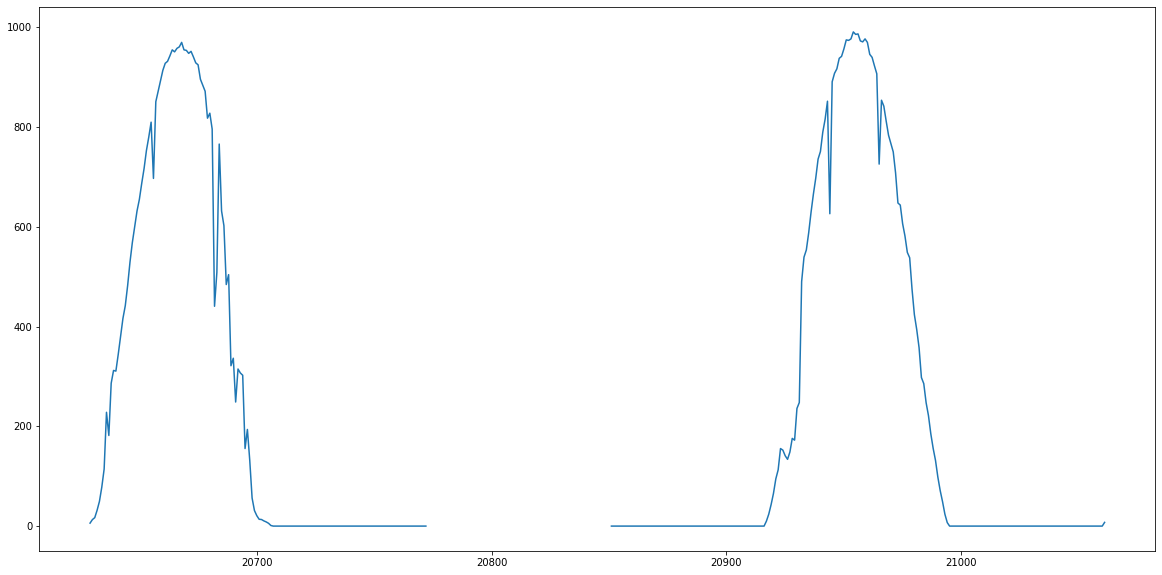

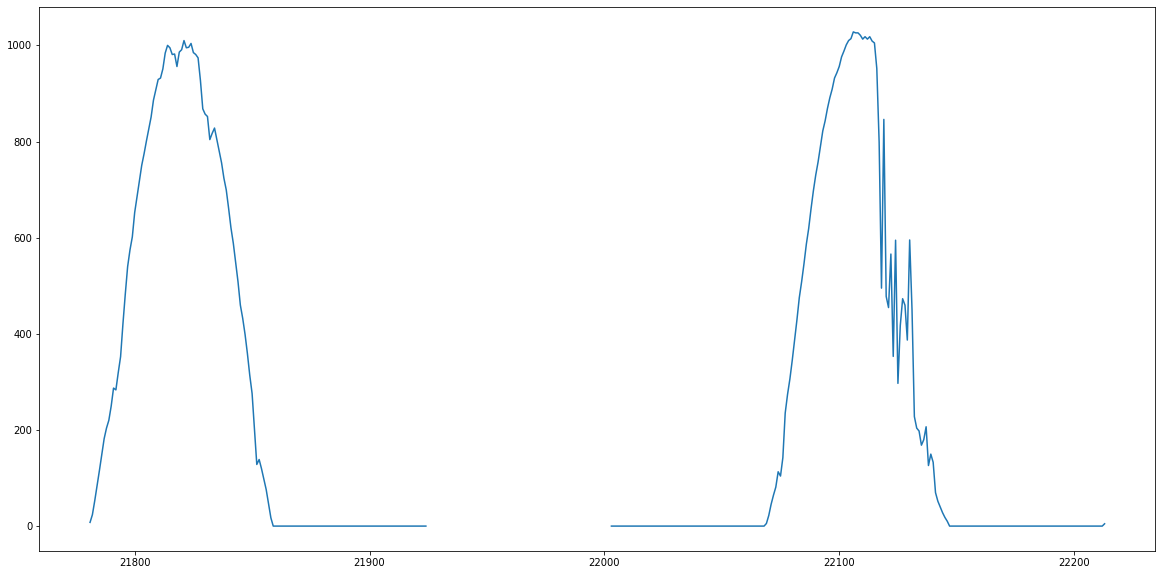

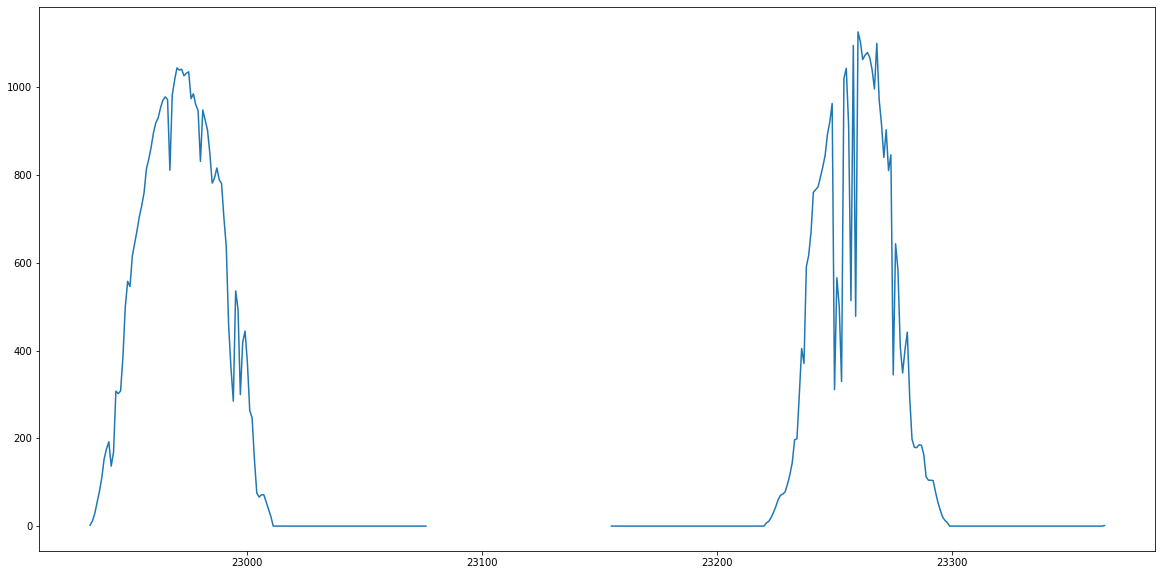

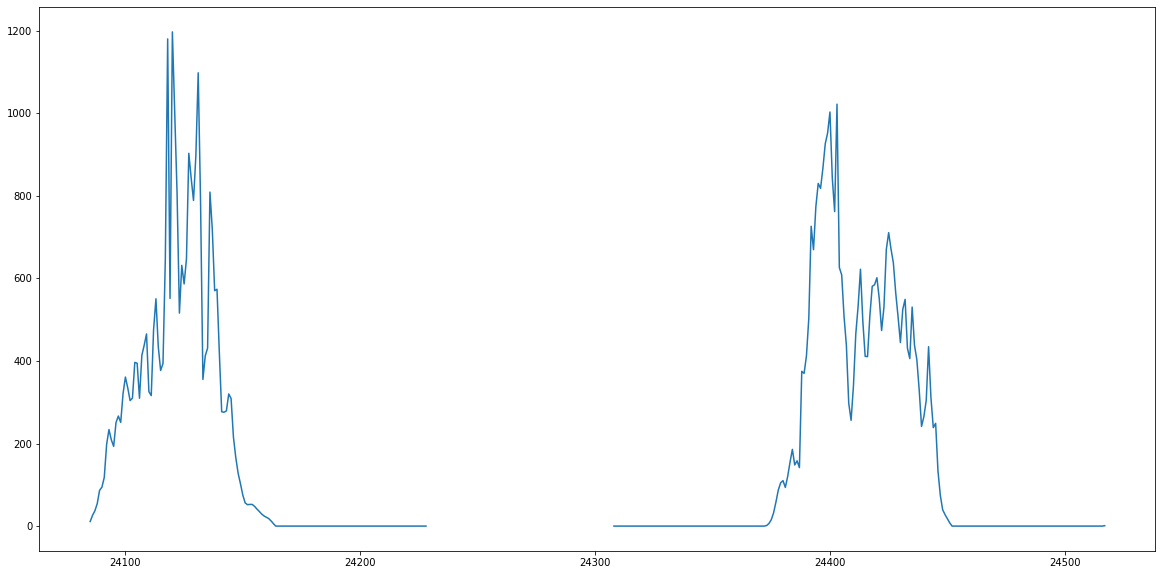

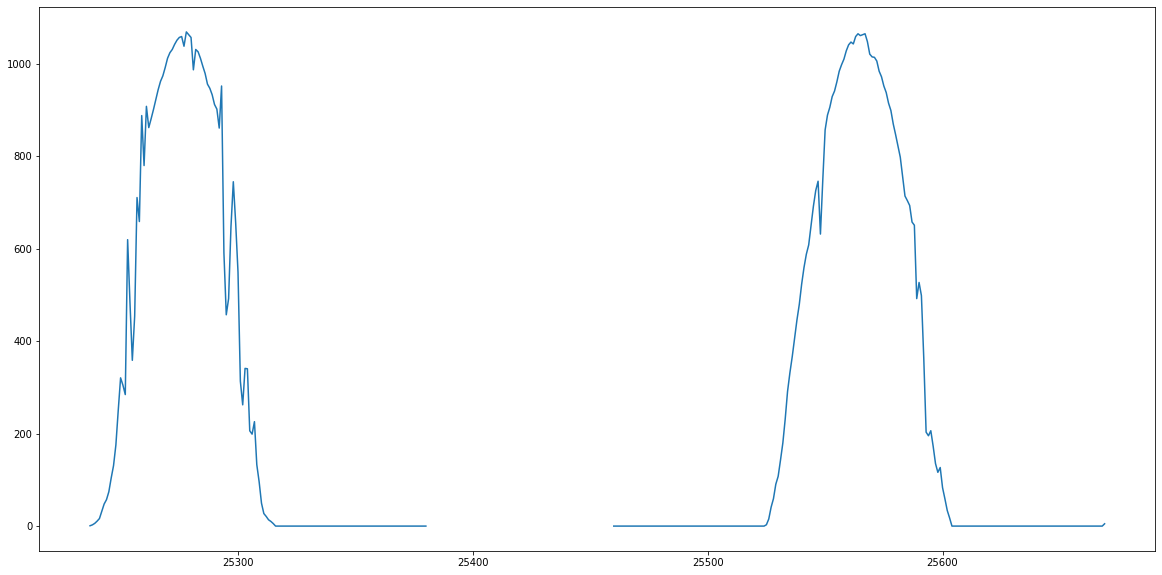

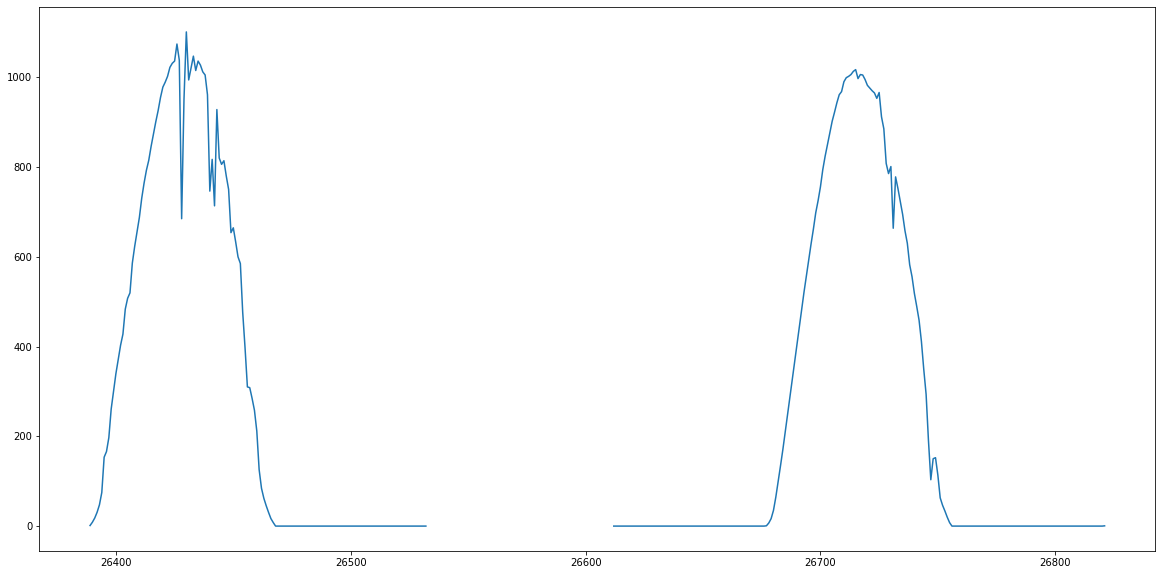

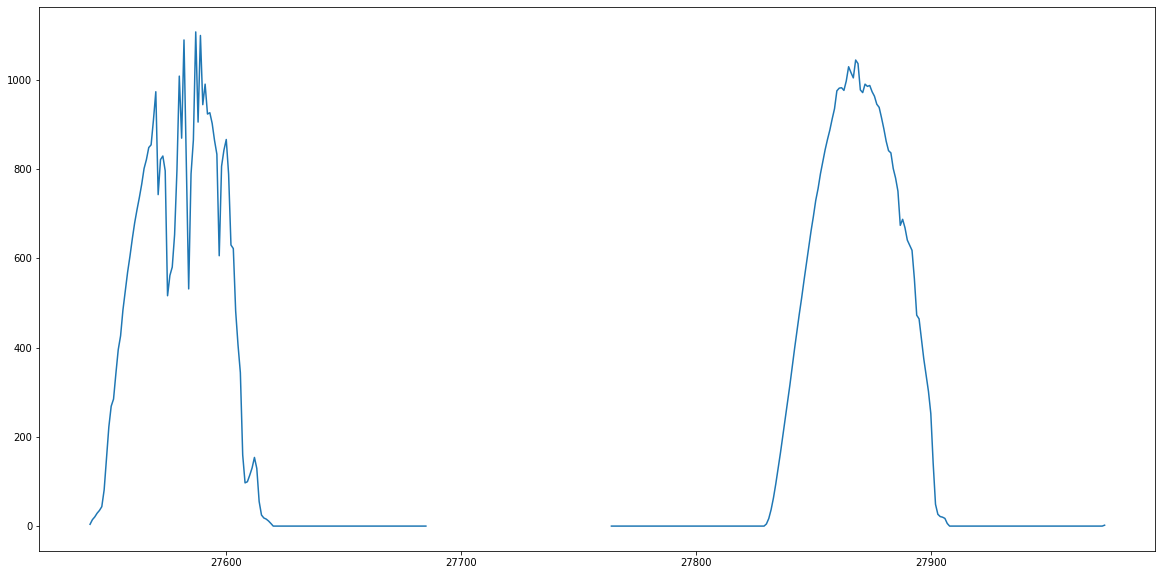

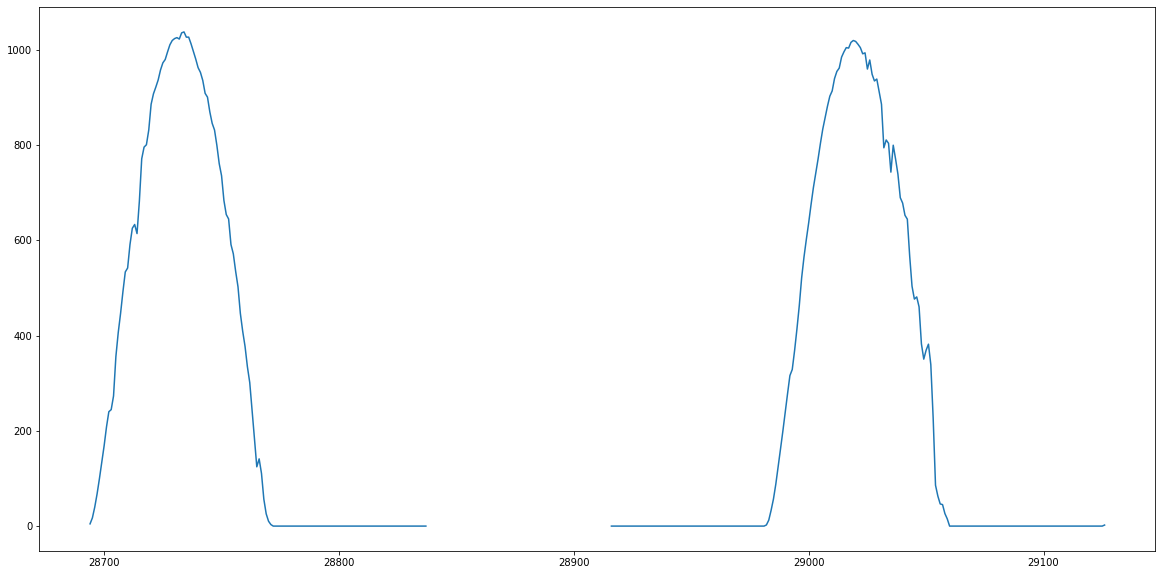

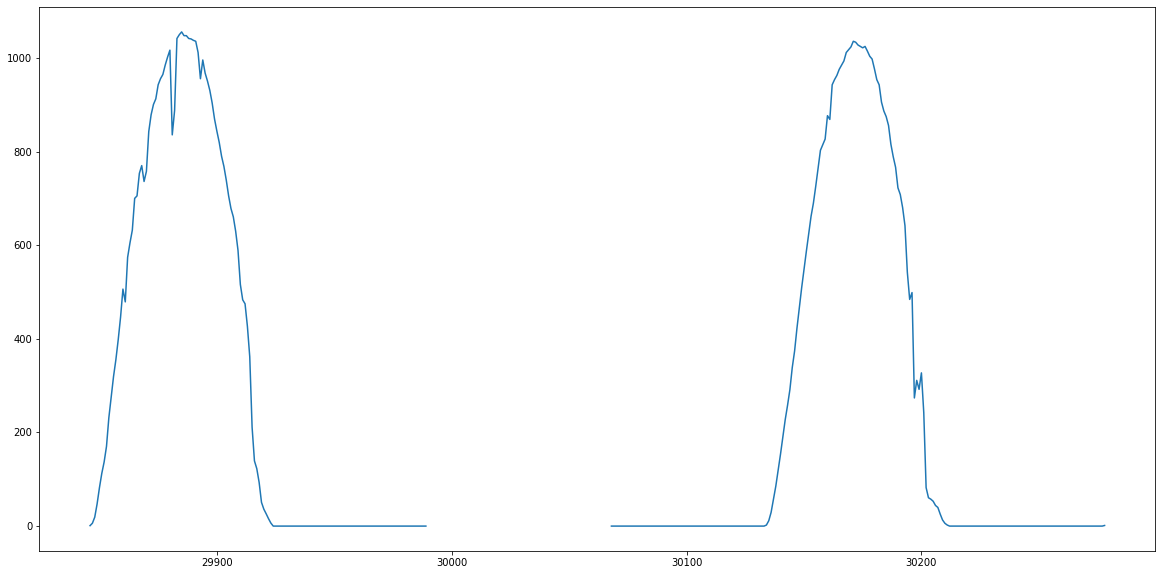

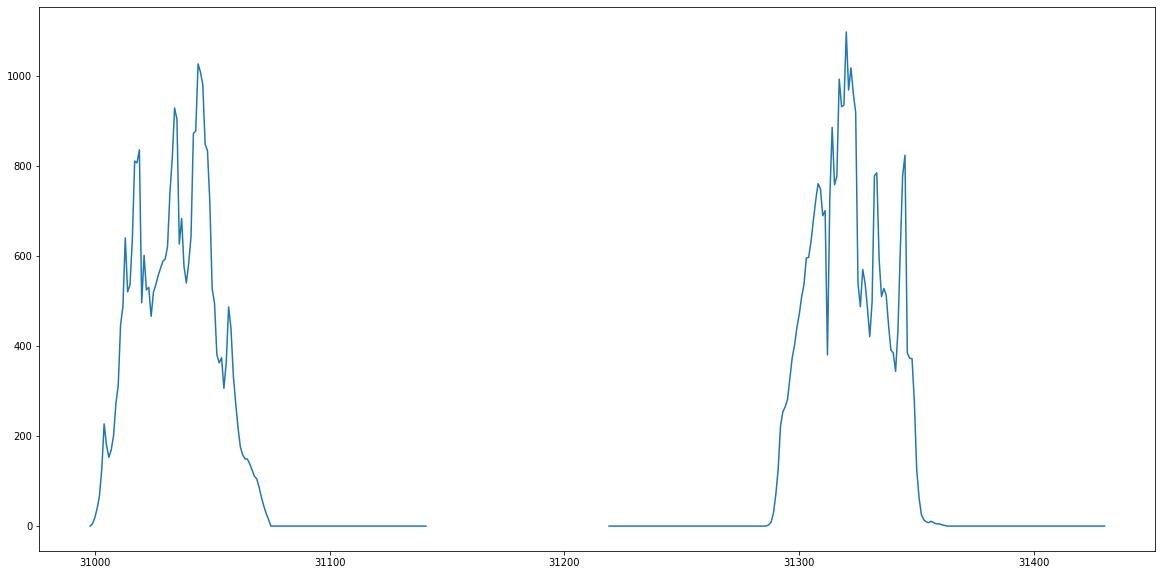

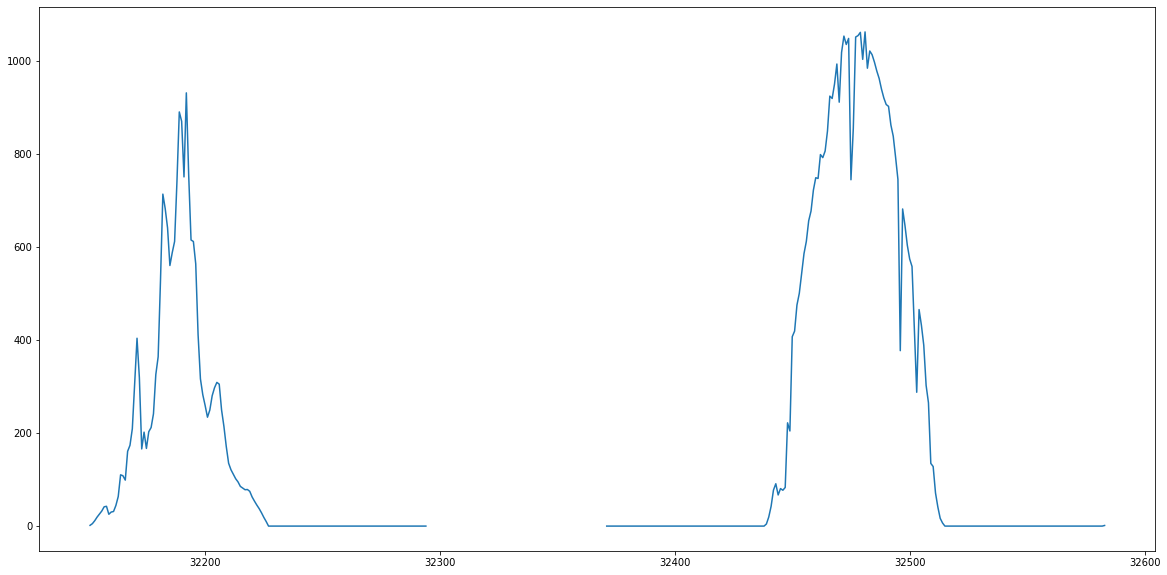

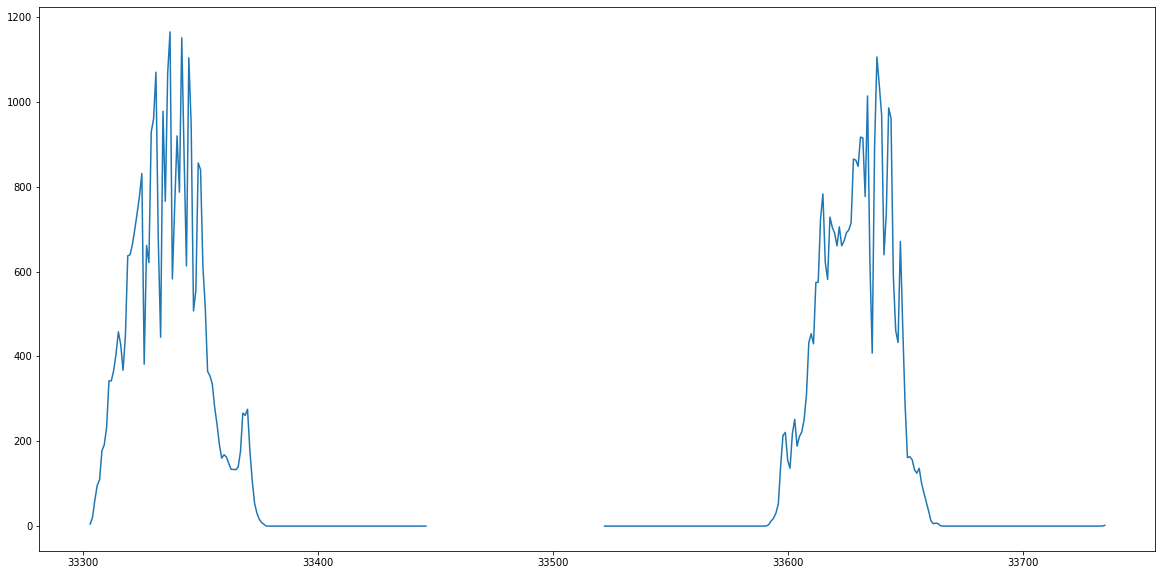

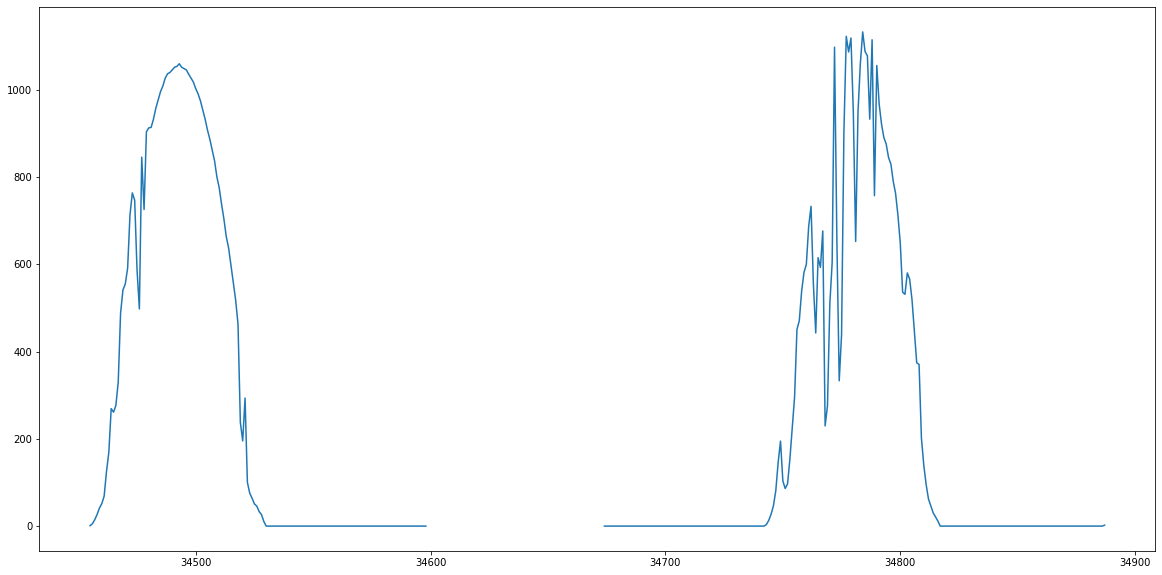

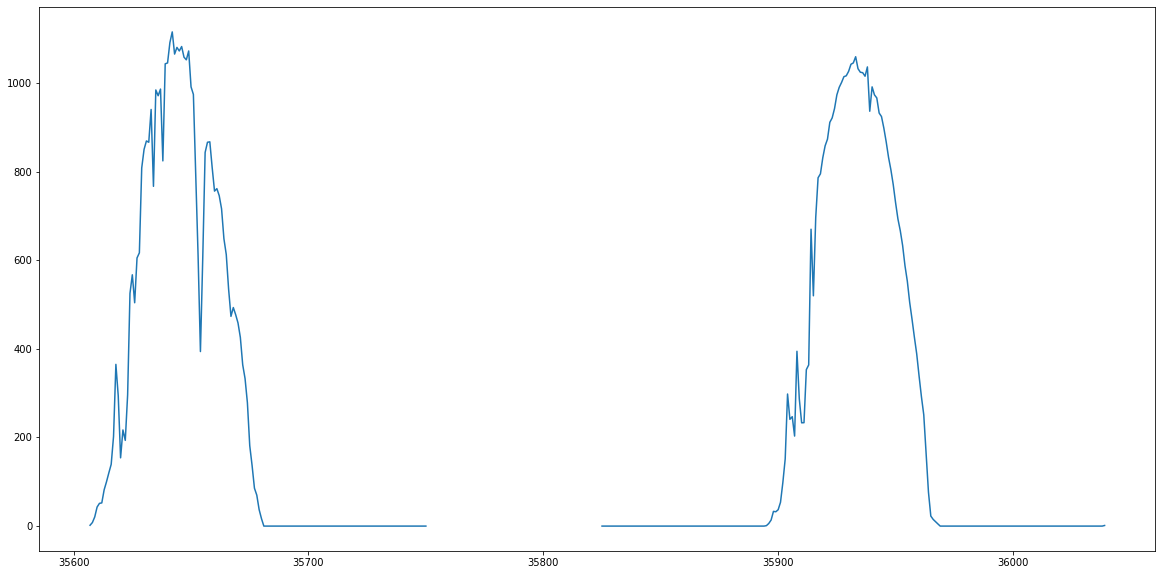

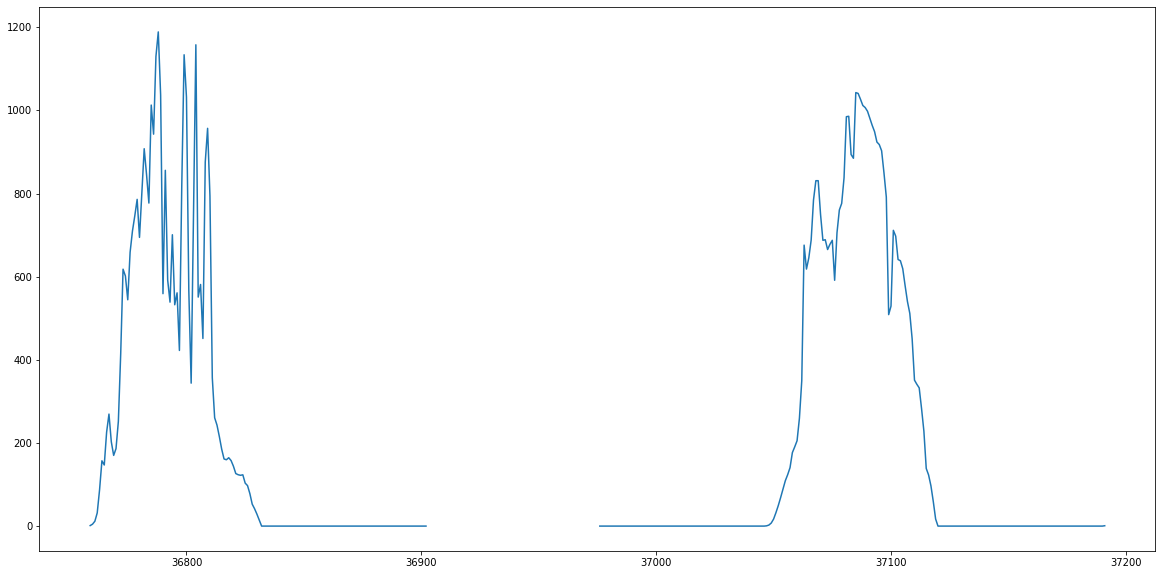

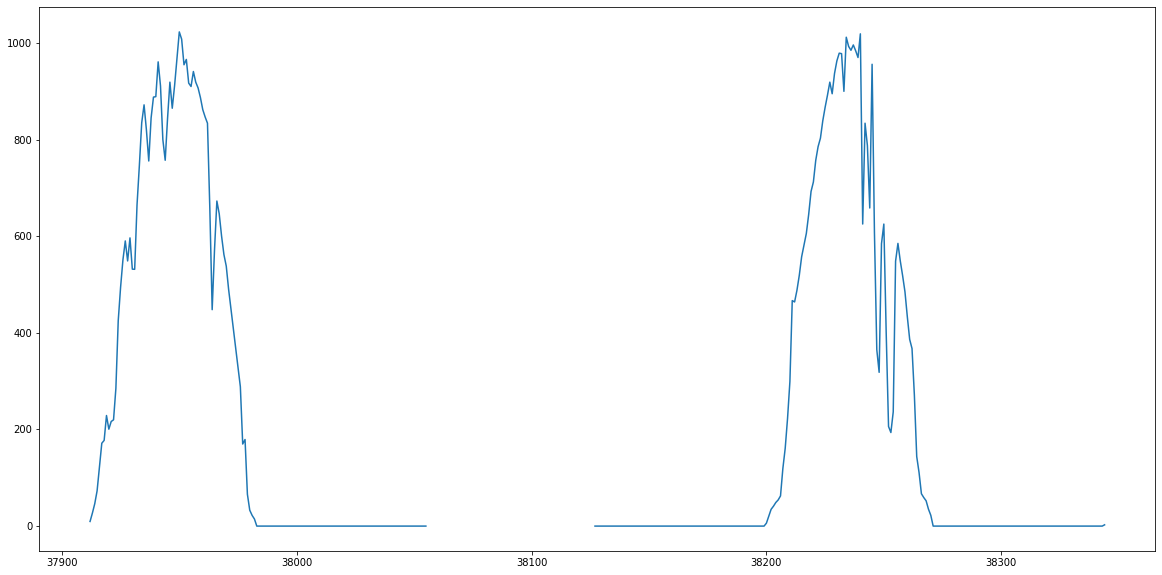

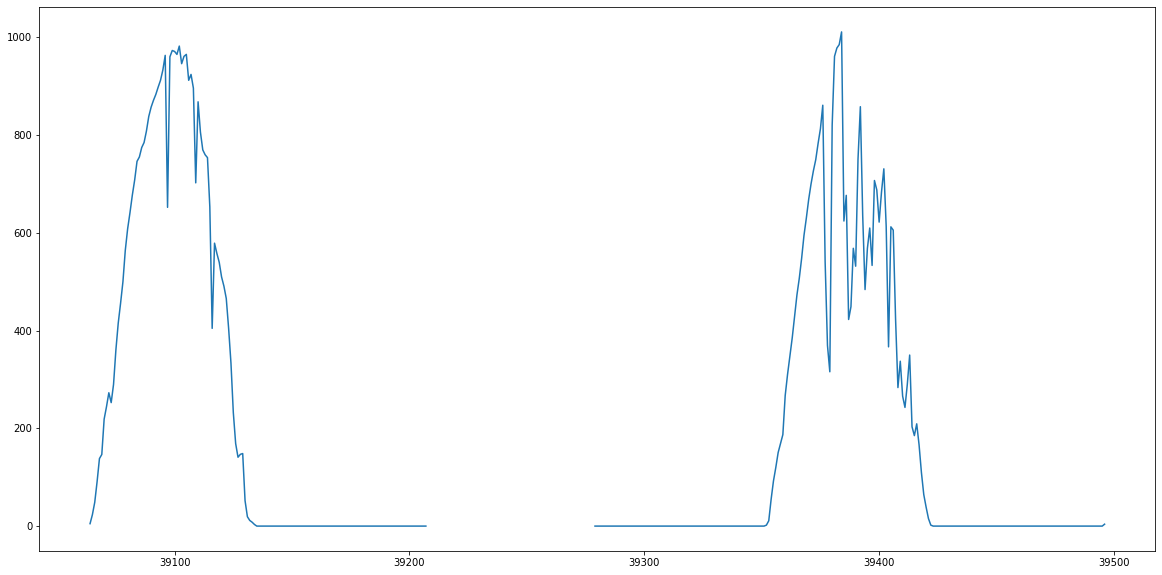

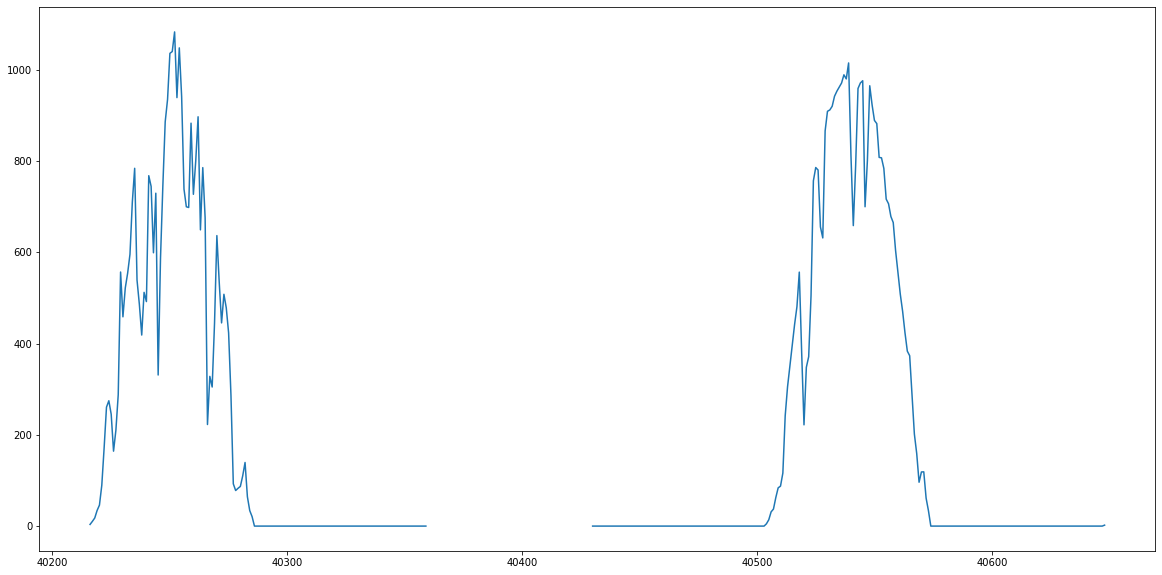

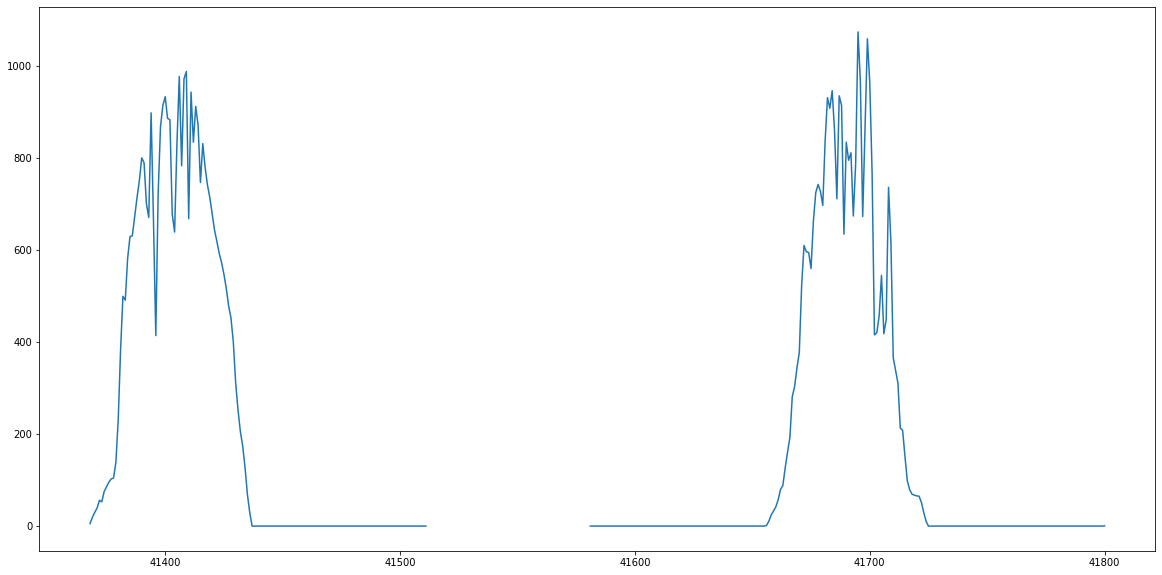

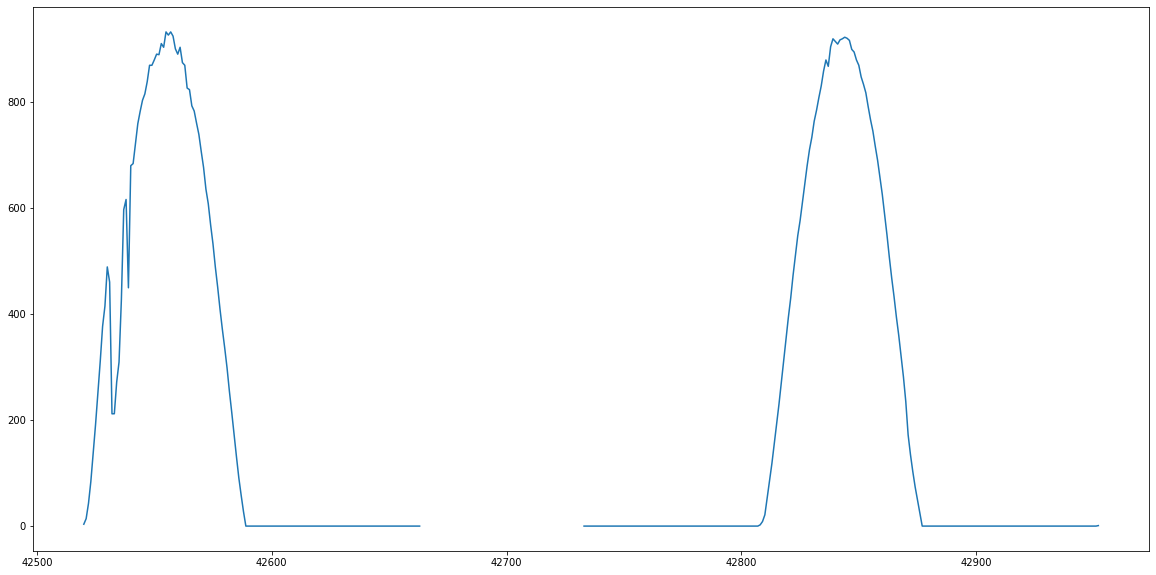

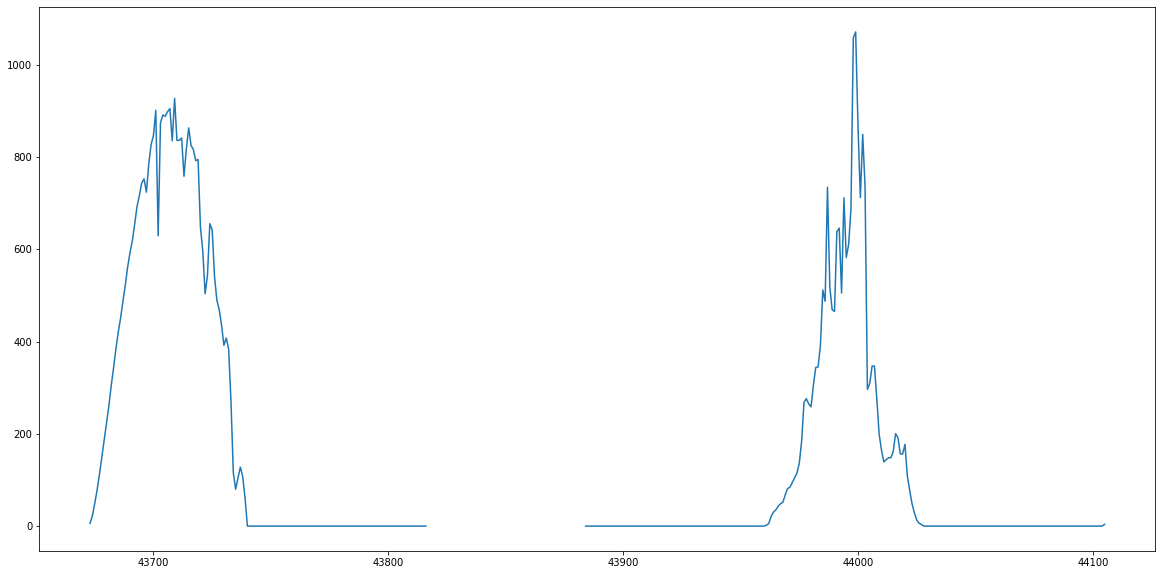

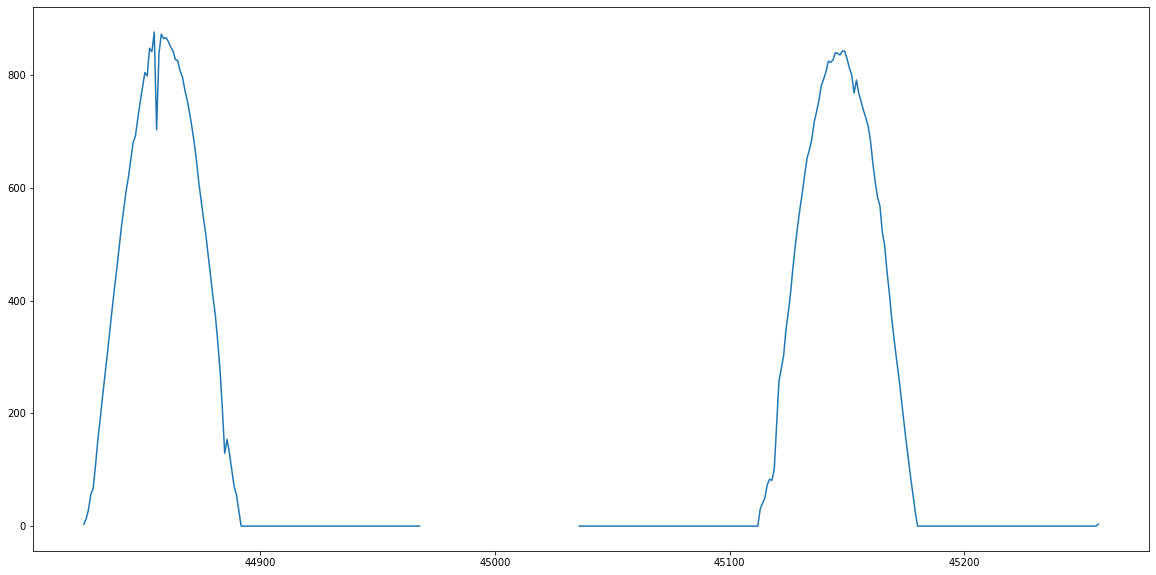

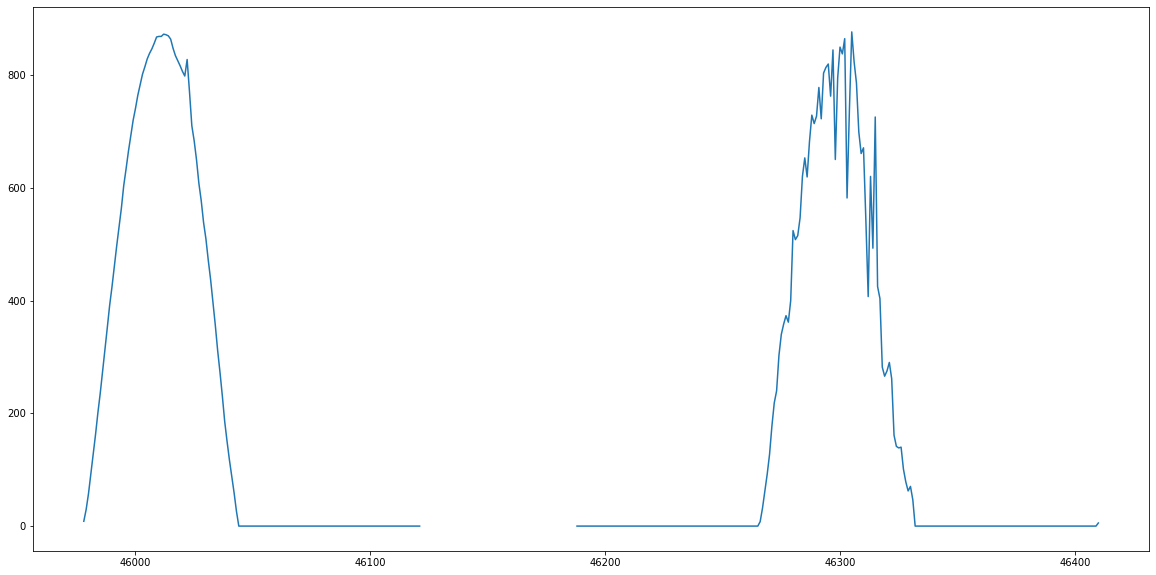

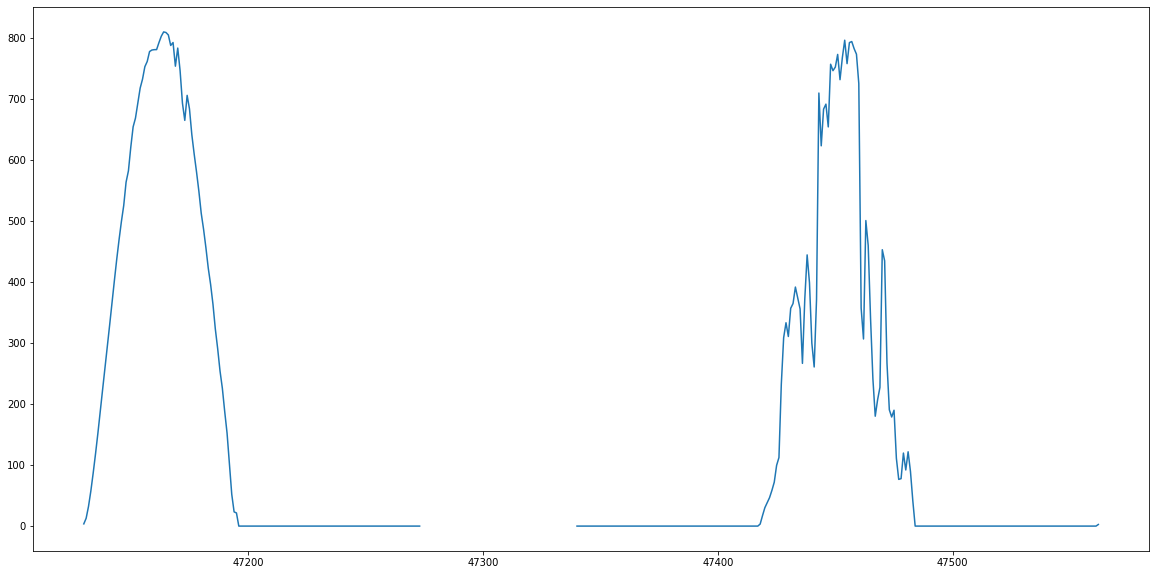

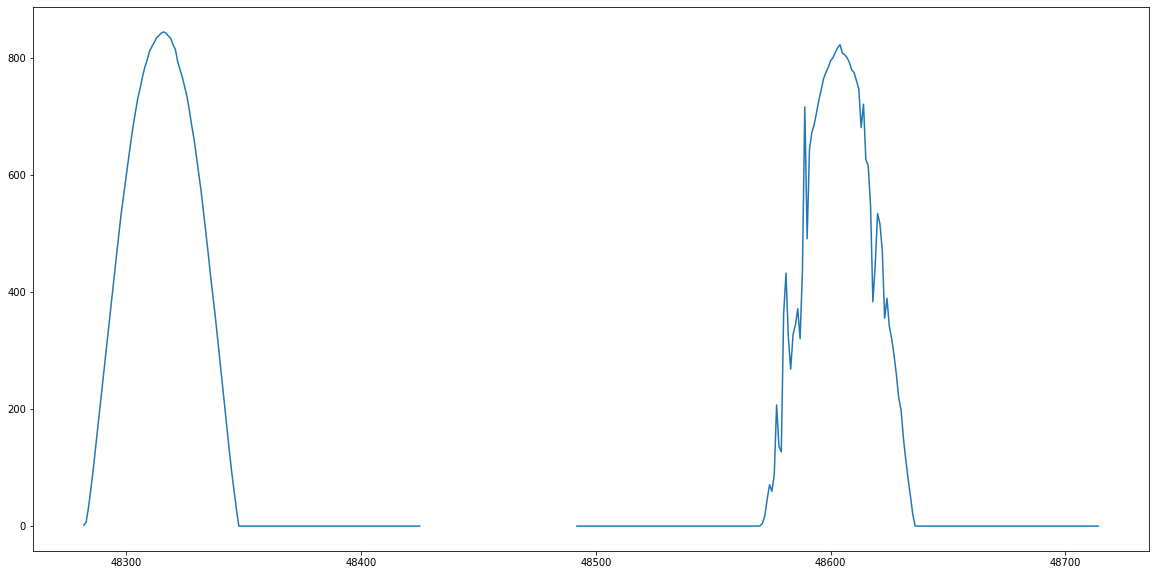

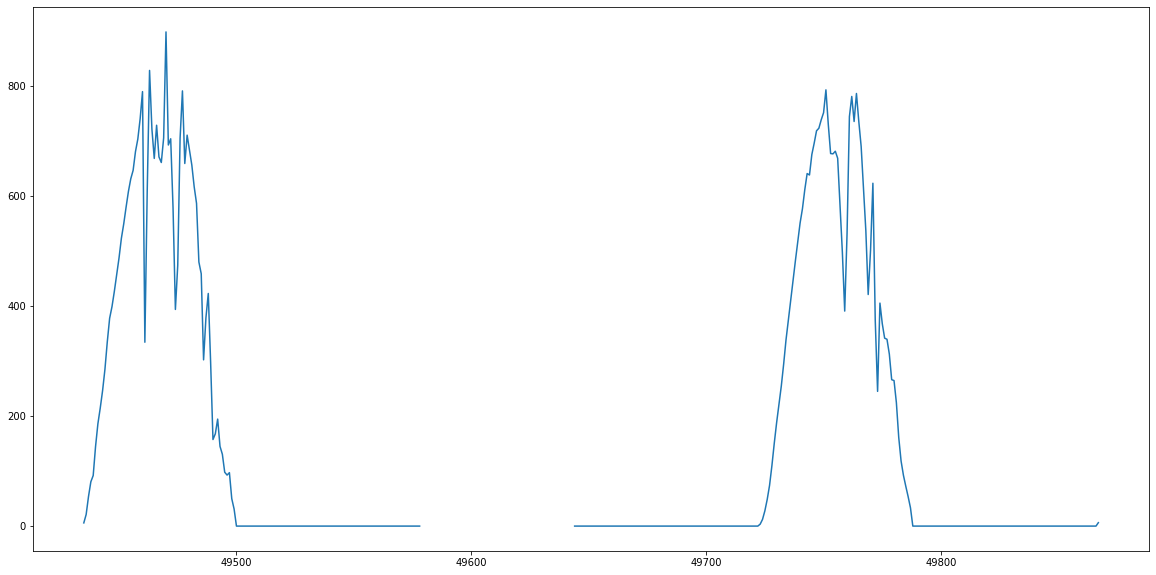

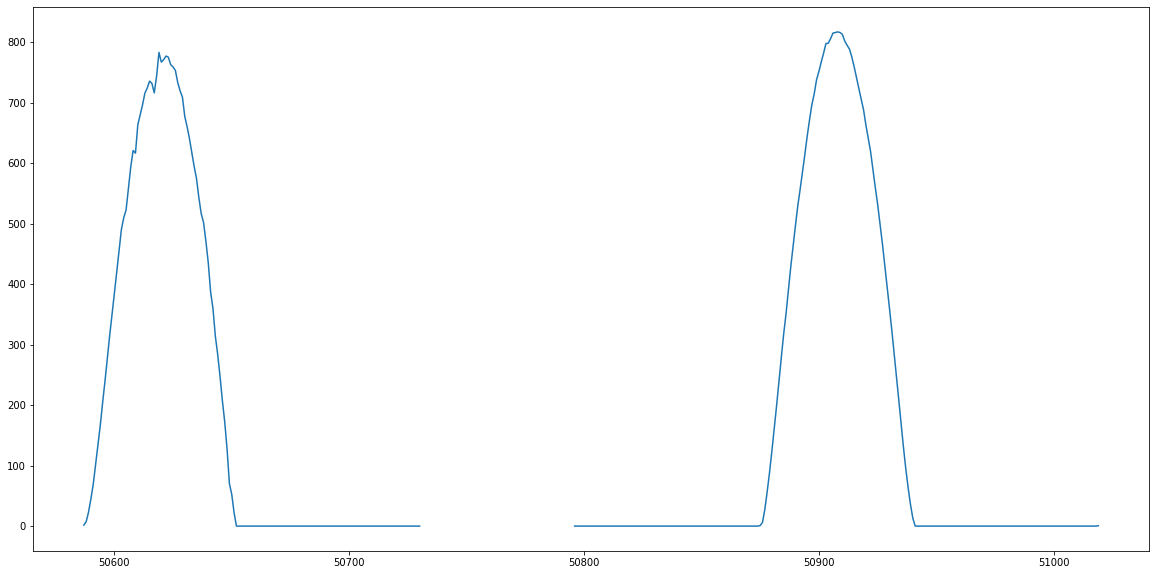

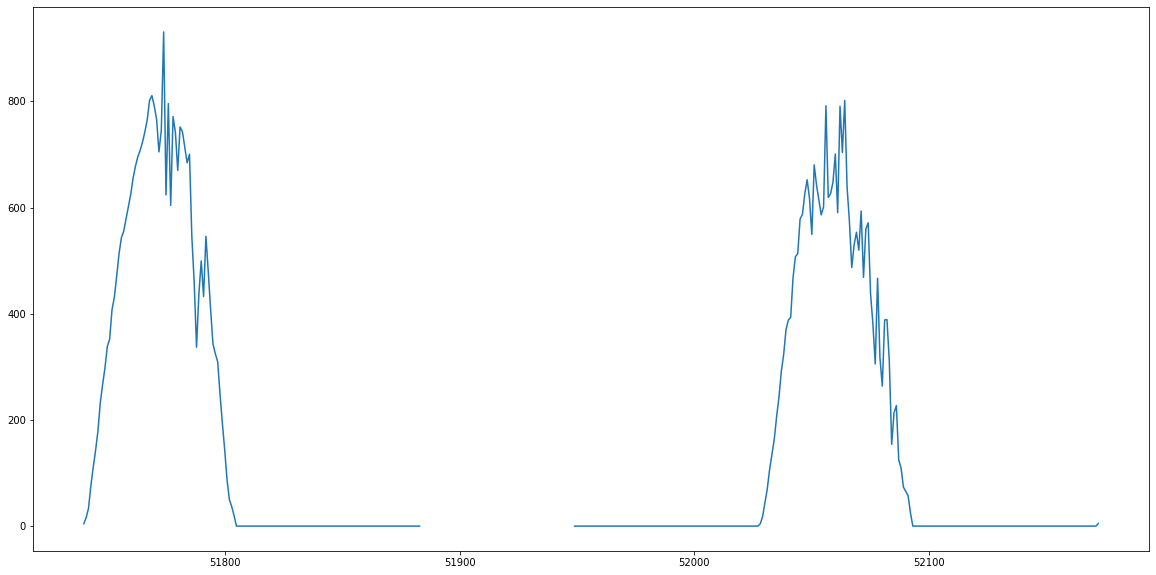

In [8]:
for istep in range(len(isteps)):
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(tmx_inc['Ig'].loc[isteps[istep]-144:isteps[istep]+288])

# Imputo datos, con la lista de la ubicaci'on  de los vac'ios de datos

## Este es con el exporta mas sencillo 

In [14]:
nombres1=['time','Ib','Ig','to','RH','P','WS','WD','alturasolar','azimuth']
tmx_inc=imp.importa(path_archivo+nombre_archivo,nombres1)
in_size,out_size= 6,6 
model_name='../../03_CNN-LSTM_training/02_grid_training/01_models/train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5'
scalery=load(open('../../03_CNN-LSTM_training/02_grid_training/03_scalers/y_scalerv06.pkl','rb'))
scalerx=load(open('../../03_CNN-LSTM_training/02_grid_training/03_scalers/x_scalerv06.pkl','rb'))
inputs=['Ig','Ib','to','RH','azimuth','alturasolar']
outputs=['Ig']
training_step=1
season_size=144

model=load_model(model_name)
tmx_inc.to_csv(path_archivo2+nombre_archivo2) #Saving the incomplete data in the file that 
                                            #will become the imputed data

for void in range(len(datavoids)):
    predi,targ=imp.Multioneshot(tmx_inc,datavoids[void],out_size,in_size,isteps[void]-144,
                                model,inputs,outputs,training_step,season_size,scalerx,scalery)
    imputed=imp.exporta(path_archivo2+nombre_archivo2,'Ig',predi,isteps[void],datavoids[void],
                                 nombres1,path_exported_file=path_archivo2+nombre_archivo2,save=True)
    
    

2022-01-20 12:43:36.003378: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-20 12:43:37.116444: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is 

In [16]:
imputed_csv=pd.read_csv(path_archivo2+nombre_archivo2,index_col=0,parse_dates=True)#,skiprows=1,names=['time','Ib','Ig','to','RH','P','WS','WD','alturasolar','azimuth'])
# imputed_csv[['Ib','Ig','to','RH','P','WS','WD','alturasolar','azimuth']].to_csv(path_archivo2+nombre_archivo2) #overwriting toepw file with only the needed columns
imputed_csv

,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
time,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817


### Importo tambien csv con datos completos 

In [17]:
comp=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv',index_col=0,parse_dates=True)

In [18]:
dias=['2018-01-12',
 '2018-01-30',
 '2018-04-17',
 '2018-06-15',
 '2018-07-19',
 '2018-08-12',
 '2018-11-14',
 '2018-12-21']


In [19]:
idates

['2018-01-01 07:20:00',
 '2018-01-09 07:20:00',
 '2018-01-17 07:20:00',
 '2018-01-25 07:20:00',
 '2018-02-02 07:20:00',
 '2018-02-10 07:20:00',
 '2018-02-18 07:10:00',
 '2018-02-26 07:10:00',
 '2018-03-06 07:00:00',
 '2018-03-14 07:00:00',
 '2018-03-22 06:50:00',
 '2018-03-30 06:40:00',
 '2018-04-07 06:40:00',
 '2018-04-15 06:30:00',
 '2018-04-23 06:20:00',
 '2018-05-01 06:20:00',
 '2018-05-09 06:10:00',
 '2018-05-17 06:10:00',
 '2018-05-25 06:10:00',
 '2018-06-02 06:10:00',
 '2018-06-10 06:10:00',
 '2018-06-18 06:10:00',
 '2018-06-26 06:10:00',
 '2018-07-04 06:10:00',
 '2018-07-12 06:20:00',
 '2018-07-20 06:20:00',
 '2018-07-28 06:20:00',
 '2018-08-05 06:20:00',
 '2018-08-13 06:30:00',
 '2018-08-21 06:30:00',
 '2018-08-29 06:30:00',
 '2018-09-06 06:30:00',
 '2018-09-14 06:30:00',
 '2018-09-22 06:40:00',
 '2018-09-30 06:40:00',
 '2018-10-08 06:40:00',
 '2018-10-16 06:40:00',
 '2018-10-24 06:40:00',
 '2018-11-01 06:50:00',
 '2018-11-09 06:50:00',
 '2018-11-17 07:00:00',
 '2018-11-25 07:

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

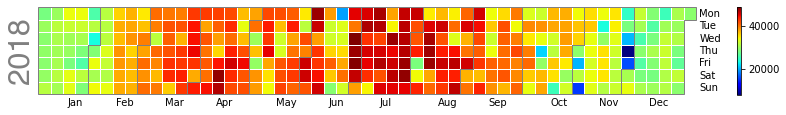

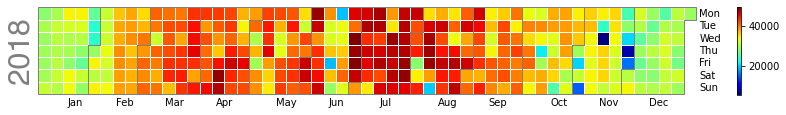

In [20]:
calplot.calplot(imputed_csv.Ig,cmap='jet')
calplot.calplot(comp.Ig,cmap='jet')

## Grafico los datos imputados contra los reales, de los dias que hac'ian falta

day_mae: 5.734092626465689


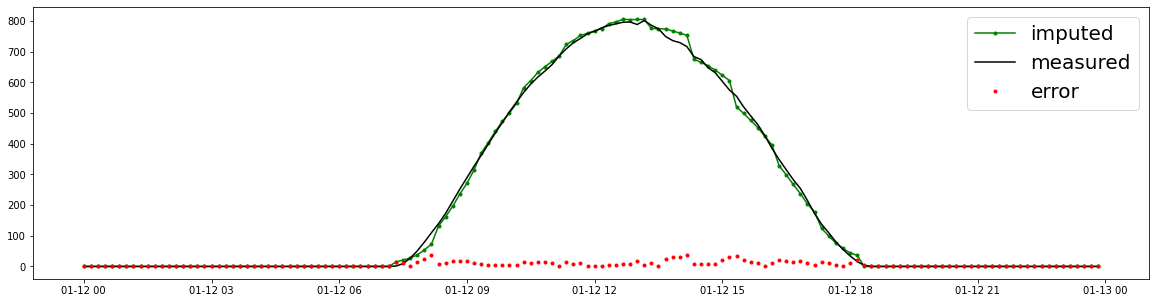

day_mae: 70.66917798535029


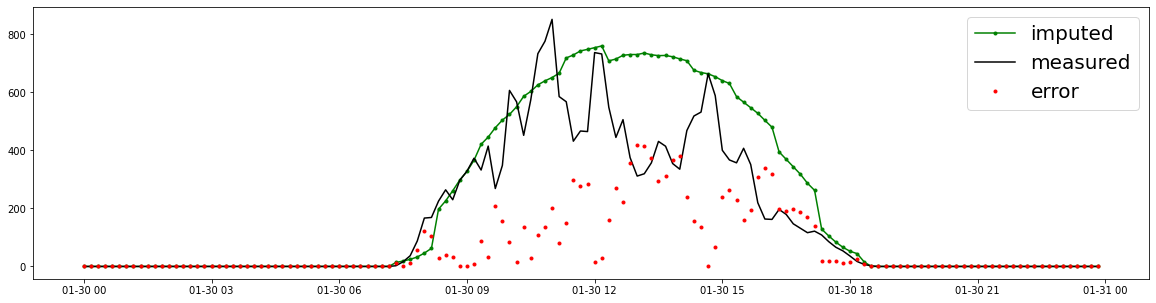

day_mae: 14.978851667881012


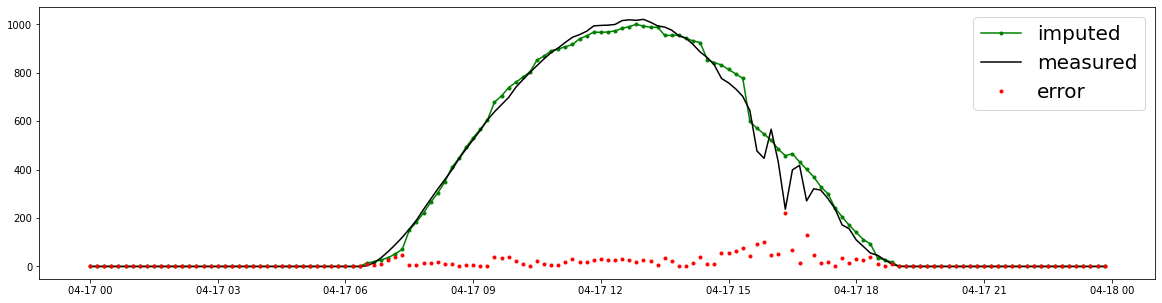

day_mae: 152.8260415445434


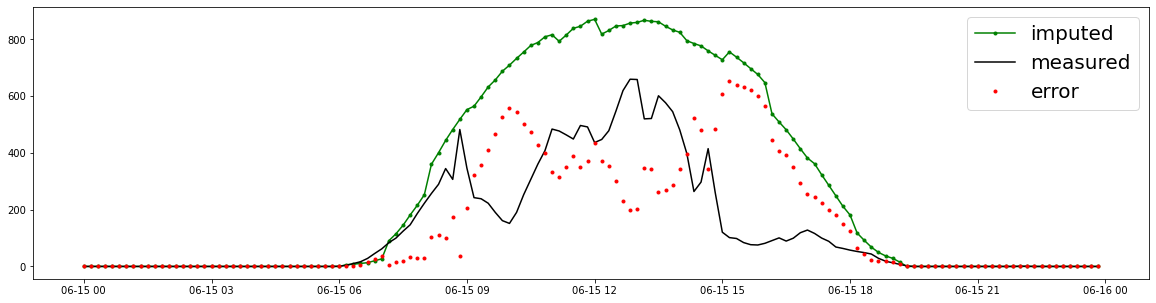

day_mae: 17.534537132581075


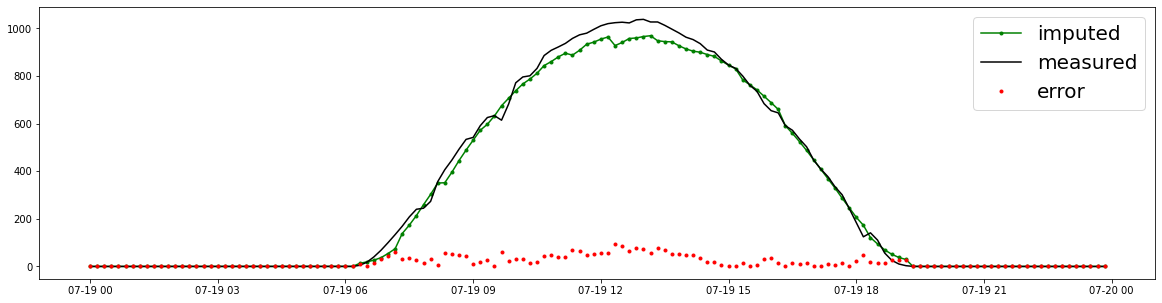

day_mae: 144.8527112305959


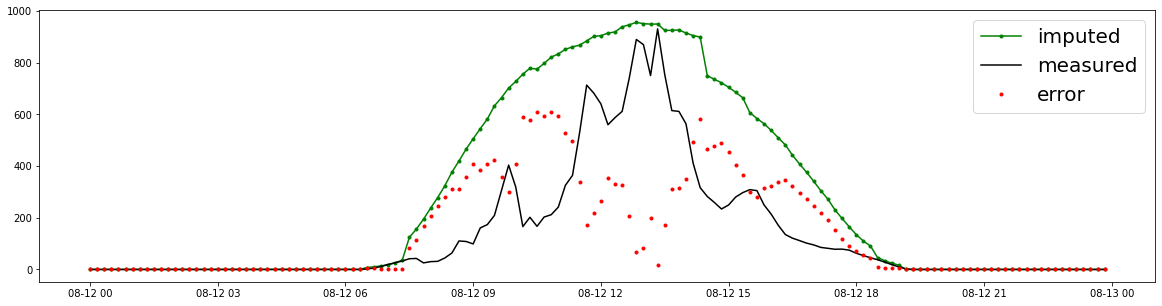

day_mae: 167.03413568014568


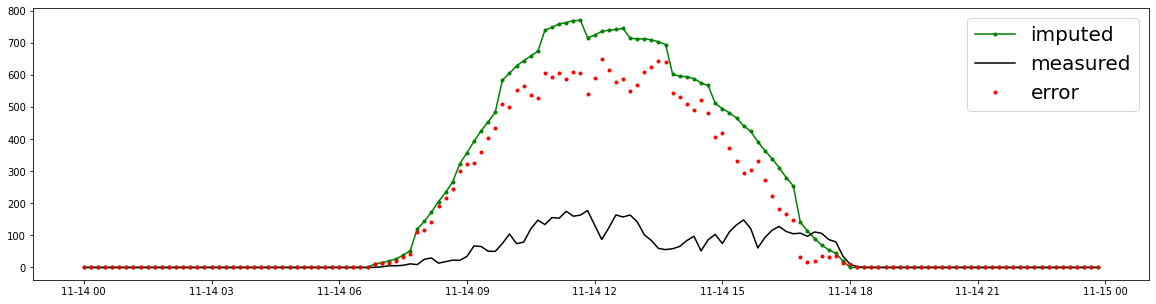

day_mae: 5.5701889151467245


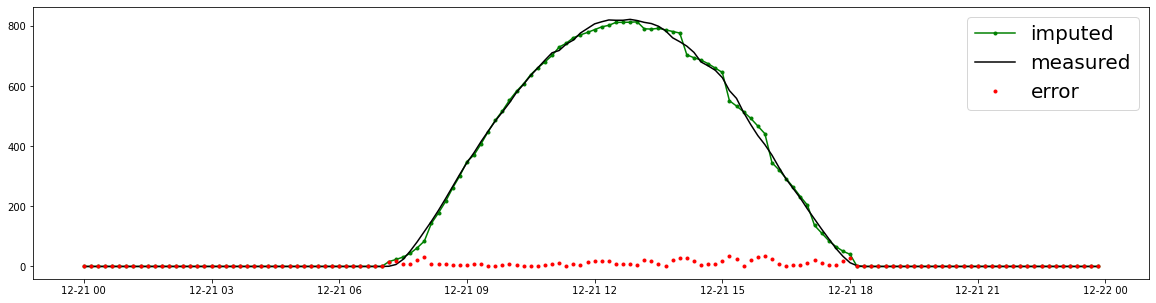

In [21]:
comp['me']=np.abs(comp.Ig-imputed_csv.Ig)
meyear=comp.me.resample('D').mean()
for dia in dias:
    fig, ax=plt.subplots(figsize=(20,5))
    print('day_mae:',meyear[dia])
    plt.plot(imputed_csv.Ig[dia],'g.-',label='imputed')
    plt.plot(comp.Ig[dia],'k-',label='measured')
    plt.plot(comp.me[dia],'r.',label='error')
    plt.legend(fontsize=20)
    plt.show()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 64)          448       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          4160      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         98816     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0